## CIND 820 Big Data Analytics Project

**Name: Nelly Grillo**

**Student number: 501144764**

**Supervisor: Ceni Babaoglu, Ph.D**

**Level of Satisfaction of airline customers using Logistic Regression, Naïve Bayes, K-Nearest Neighbors, Decision Tree, Random Forest, and Extreme Gradient Boosting Machine Learning Algorithms**

### Library Imports

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
#!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as rf
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import warnings
warnings.filterwarnings('ignore')

In [308]:
# Loading the dataset
df_train = pd.read_csv('train.csv', index_col='id')
df_test = pd.read_csv('test.csv')

## **Initial Analysis**

**Data Description**

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal travel, Business travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not applicable; 1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of Online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of Inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of Baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of Inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline Satisfaction level (Satisfied, neutral or dissatisfied) (Target variable)

In [309]:
# Looking at first few instances in train dataset
df_train.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [310]:
# Looking at first few instances in test dataset
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [311]:
# Looking at column names in train dataset
df_train.columns

Index(['Unnamed: 0', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [312]:
# Looking at column names in test dataset
df_test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [313]:
# Looking for the shape in train dataset
print("The data shape in train dataset is: {}".format(df_train.shape))

The data shape in train dataset is: (103904, 24)


In [314]:
# Looking for the shape in test dataset
print("The data shape in test dataset is: {}".format(df_test.shape))

The data shape in test dataset is: (25976, 25)


The test dataset contains 25976 entries, and 25 columns.

**Variables:**

**Categorical Variables:** 
Gender, Customer Type, Type of Travel, Class, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Check-in service, Inflight service, Cleanliness, and Satisfaction.

**Numerical Variables:**
Age, Flight Distance, Departure Delay in Minutes, and Arrival Delay in Minutes.

In [315]:
categ_var = ['Gender', 'Customer Type',  'Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room',   'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','Satisfaction']

numer_var = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [316]:
# Checking data in train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 70172 to 62567
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1

In [317]:
# # Checking data in test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

**Assigning the appropriate column names and dropping columns in train and test dataset**

Elements renamed in 'Customer Type': 'disloyal customer' as 'First-time Customer'

Elements renamed in 'Class' column: 'Eco', and 'Eco Plus' to 'Economy'

Column 'satisfaction' corrected to 'Satisfaction'

Column 'Leg room service' renamed

Drop unnecessary 'Unnamed' column and sort by ascending 'id'

Column 'Departure Delay in Minutes' type changed to float as 'Arrival Delay in Minutes'


In [318]:
# Rename elements in 'Customer type' column
df_train['Customer Type'] = df_train['Customer Type'].map({'Loyal Customer': 'Loyal Customer', 'disloyal Customer': 'First-time Customer'})
df_test['Customer Type'] = df_test['Customer Type'].map({'Loyal Customer': 'Loyal Customer', 'disloyal Customer': 'First-time Customer'})

# Rename elements in 'Class' column
df_train['Class'] = df_train['Class'].map({'Eco': 'Economy', 'Eco Plus': 'Economy', 'Business': 'Business'})
df_test['Class'] = df_test['Class'].map({'Eco': 'Economy', 'Eco Plus': 'Economy', 'Business': 'Business'})

# Column 'satisfaction'
df_train = df_train.rename(columns={'satisfaction': 'Satisfaction'})
df_test = df_test.rename(columns={'satisfaction': 'Satisfaction'})

# Column 'leg room service' renamed
df_train = df_train.rename(columns={'Leg room service': 'Leg room'})
df_test = df_test.rename(columns={'Leg room service': 'Leg room'})

# Drop "Unnamed" column and sort by 'ID'
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train = df_train.sort_values('id', ascending = True)

df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('id', axis=1)

# Changing type of 'Departure Delay in Minutes' column to float64
df_train['Departure Delay in Minutes'] = df_train['Departure Delay in Minutes'].astype('float')
df_test['Departure Delay in Minutes'] = df_test['Departure Delay in Minutes'].astype('float')

In [319]:
# Checking the changes in train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [320]:
# Checking the changes in test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [321]:
# Checking the shape of train and test data set after the changes 
print("The data shape in train dataset is: {}".format(df_train.shape))
print("The data shape in test dataset is: {}".format(df_test.shape))

The data shape in train dataset is: (103904, 23)
The data shape in test dataset is: (25976, 23)


### Exploratory Data Analysis

### **1. Univariate Analysis**

### Categorical Variables 

**Number of unique categorical values**

In [322]:
df_train.nunique()[:23].sort_values(ascending=False)

Flight Distance                      3802
Arrival Delay in Minutes              455
Departure Delay in Minutes            446
Age                                    75
Online boarding                         6
Cleanliness                             6
Leg room                                6
On-board service                        6
Inflight entertainment                  6
Seat comfort                            6
Gate location                           6
Food and drink                          6
Inflight service                        6
Ease of Online booking                  6
Departure/Arrival time convenient       6
Inflight wifi service                   6
Checkin service                         6
Baggage handling                        5
Gender                                  2
Customer Type                           2
Class                                   2
Type of Travel                          2
Satisfaction                            2
dtype: int64

In [323]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

**Frequency table and Frequency Distribution of Categorical variable**

**Satisfaction** - Categorical Variable: Ordinal

**Cheking for Imbalance**

In [324]:
# Table comparing each class in the target variable
s = df_train['Satisfaction']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
neutral or dissatisfied,58879,0.566667,56.7%
satisfied,45025,0.433333,43.3%


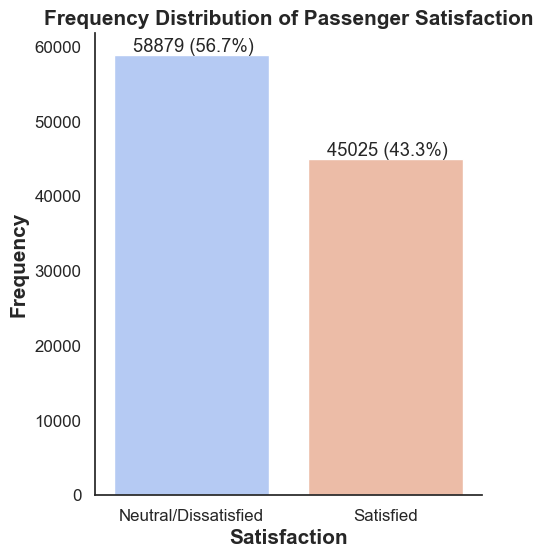

In [325]:
# Visualization of the Safisfaction distribution 
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data= df_train,x='Satisfaction',palette='coolwarm')
plt.title('Frequency Distribution of Passenger Satisfaction',weight='bold',fontsize='15')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df_train)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('Frequency',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot1.png',transparent=True, bbox_inches='tight')

The above plot shows that the data is relatively evenly distributed between the Neutral/Dissatisfied and the Satisfied passengers (57% and 43% respectively). It can be interpreted as a balanced data because there is no significant difference. The dataset will not need any special treatment/resampling.

**Gender** - Categorical Variable: Nominal

In [326]:
# Gender ratio
s = df_train['Gender']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
Female,52727,0.507459,50.7%
Male,51177,0.492541,49.3%


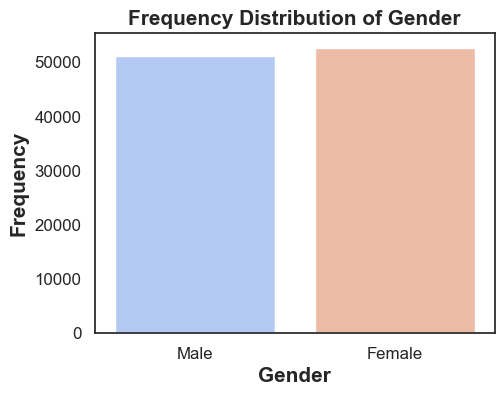

In [327]:
# Visualization of the Gender distribution
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Gender', palette = 'coolwarm')
plt.title('Frequency Distribution of Gender',weight='bold',fontsize='15')
ax.set_xlabel('Gender', fontsize=15, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

This plot shows that there is no significant difference in the distribution between males and females. 

**Customer Type** - Categorical Variable: Nominal

In [328]:
# Customer Type ratio
s = df_train['Customer Type']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
Loyal Customer,84923,0.817322,81.7%
First-time Customer,18981,0.182678,18.3%


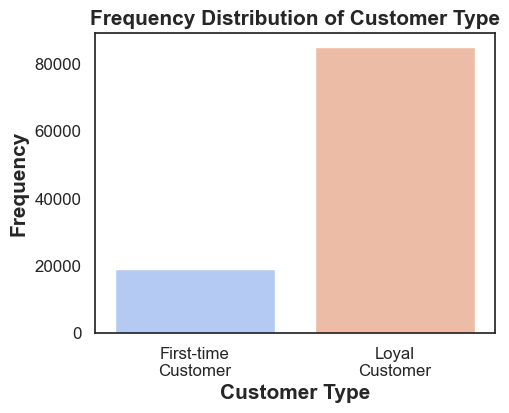

In [329]:
# Visualization of the Customer Type distribution
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Customer Type', palette = 'coolwarm')
plt.title('Frequency Distribution of Customer Type',weight='bold',fontsize='15')
ax.set_xlabel('Customer Type', fontsize=15, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

The difference between First-time Customers and Loyal Customers is significant, with a large number of loyal or returning customers (around 82%).

**Type of Travel** - Categorical Variable: Nominal

In [330]:
# Type of Travel ratio
s = df_train['Type of Travel']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
Business travel,71655,0.689627,69.0%
Personal Travel,32249,0.310373,31.0%


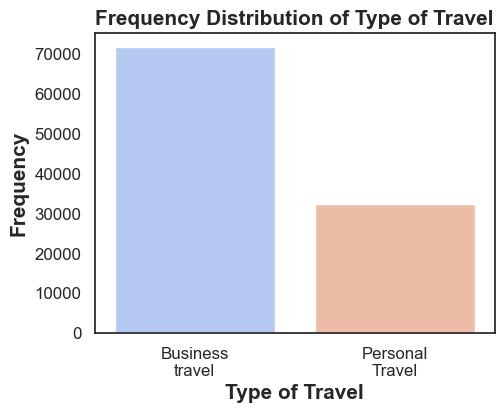

In [331]:
# Visualization of the Type of Travel distribution
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Type of Travel', palette = 'coolwarm')
plt.title('Frequency Distribution of Type of Travel',weight='bold',fontsize='15')
ax.set_xlabel('Type of Travel', fontsize=15, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

This plot shows that there is a large number of Business customers, and the airline might focus more on this group. 

**Class** - Categorical Variable: Nominal

In [332]:
# Class feature ratio
s = df_train['Class']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
Economy,54239,0.522011,52.2%
Business,49665,0.477989,47.8%


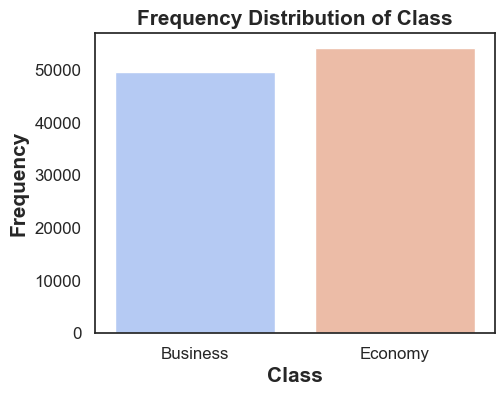

In [333]:
# Visualization of the Class distribution
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Class', palette = 'coolwarm')
plt.title('Frequency Distribution of Class',weight='bold',fontsize='15')
ax.set_xlabel('Class', fontsize=15, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

This plot shows that the Economy class is the predominant after combining the Eco and Eco Plus clases, but the difference is small.
Although, the Business Type of Travel was higher, there were lower customers in Business Class (approx. 48%).

**Inflight wifi service** - Categorical Variable: Ordinal

In [334]:
# Inflight wifi service ratio
s = df_train['Inflight wifi service']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
3,25868,0.248961,24.9%
2,25830,0.248595,24.9%
4,19794,0.190503,19.1%
1,17840,0.171697,17.2%
5,11469,0.110381,11.0%
0,3103,0.029864,3.0%


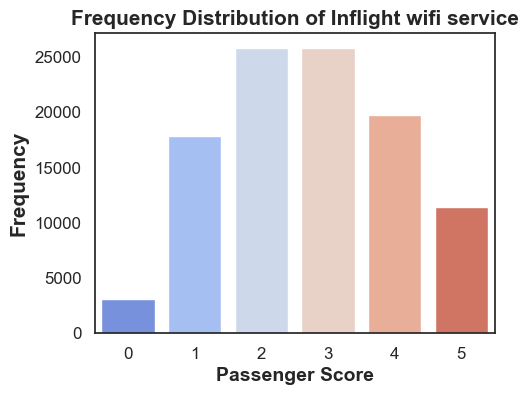

In [335]:
# Visualization of Inflight wifi service feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Inflight wifi service', palette = 'coolwarm')
plt.title('Frequency Distribution of Inflight wifi service',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Departure/Arrival time convenient** - Categorical Variable: Ordinal

In [336]:
# Departure/Arrival time convenient ratio
s = df_train['Departure/Arrival time convenient']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,25546,0.245862,24.6%
5,22403,0.215612,21.6%
3,17966,0.172910,17.3%
2,17191,0.165451,16.5%
1,15498,0.149157,14.9%
0,5300,0.051009,5.1%


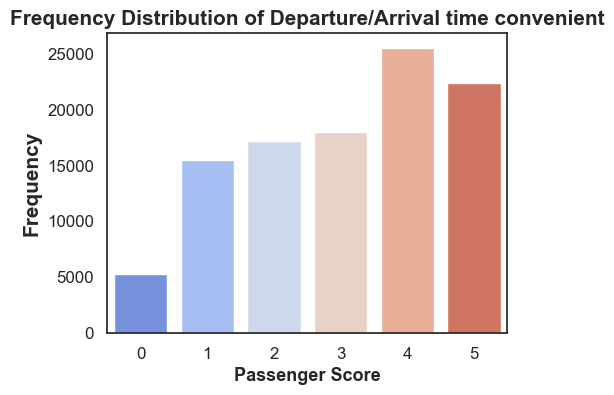

In [337]:
# Visualization of Departure/Arrival time convenient feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Departure/Arrival time convenient', palette = 'coolwarm')
plt.title('Frequency Distribution of Departure/Arrival time convenient',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=13, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Ease of Online booking** - Categorical Variable: Ordinal

In [338]:
# Ease of Online booking ratio
s = df_train['Ease of Online booking']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
3,24449,0.235304,23.5%
2,24021,0.231185,23.1%
4,19571,0.188357,18.8%
1,17525,0.168665,16.9%
5,13851,0.133306,13.3%
0,4487,0.043184,4.3%


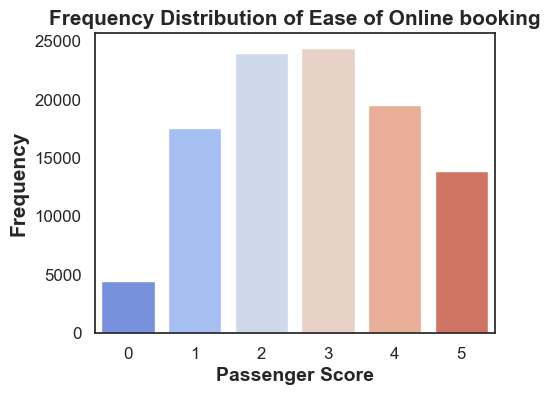

In [339]:
# Visualization of Ease of Online booking feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Ease of Online booking', palette = 'coolwarm')
plt.title('Frequency Distribution of Ease of Online booking',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Gate location** - Categorical Variable: Ordinal

In [340]:
# Gate location ratio
s = df_train['Gate location']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
3,28577,0.275033,27.5%
4,24426,0.235082,23.5%
2,19459,0.187279,18.7%
1,17562,0.169021,16.9%
5,13879,0.133575,13.4%
0,1,0.000010,0.0%


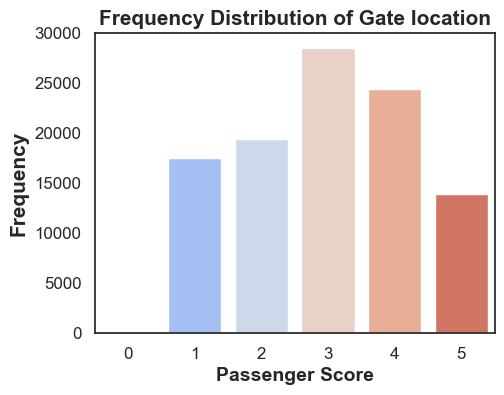

In [341]:
# Visualization of Gate location feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Gate location', palette = 'coolwarm')
plt.title('Frequency Distribution of Gate location',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Food and drink** - Categorical Variable: Ordinal

In [342]:
# Food and drink ratio
s = df_train['Food and drink']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,24359,0.234438,23.4%
5,22313,0.214746,21.5%
3,22300,0.214621,21.5%
2,21988,0.211618,21.2%
1,12837,0.123547,12.4%
0,107,0.001030,0.1%


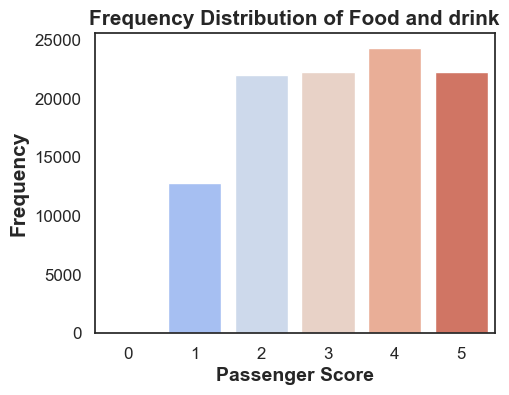

In [343]:
# Visualization of Food and drink feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Food and drink', palette = 'coolwarm')
plt.title('Frequency Distribution of Food and drink',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Online boarding** - Categorical Variable: Ordinal

In [344]:
# Online boarding ratio
s = df_train['Online boarding']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,30762,0.296062,29.6%
3,21804,0.209848,21.0%
5,20713,0.199347,19.9%
2,17505,0.168473,16.8%
1,10692,0.102903,10.3%
0,2428,0.023368,2.3%


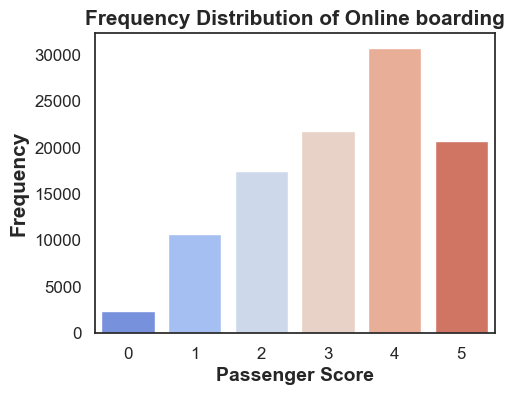

In [345]:
# Visualization of Online boarding feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Online boarding', palette = 'coolwarm')
plt.title('Frequency Distribution of Online boarding',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Seat comfort** - Categorical Variable: Ordinal

In [346]:
# Seat Comfort
s = df_train['Seat comfort']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,31765,0.305715,30.6%
5,26470,0.254754,25.5%
3,18696,0.179935,18.0%
2,14897,0.143373,14.3%
1,12075,0.116213,11.6%
0,1,0.000010,0.0%


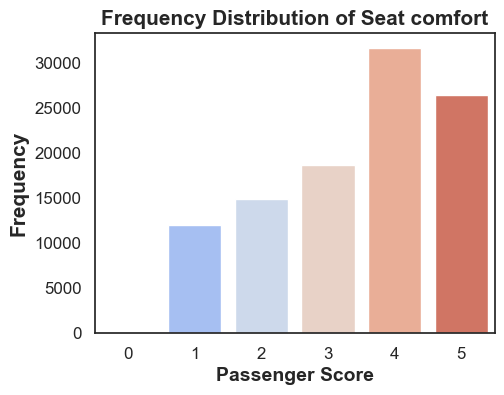

In [347]:
# Visualization of Seat comfort feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Seat comfort', palette = 'coolwarm')
plt.title('Frequency Distribution of Seat comfort',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Inflight entertainment** - Categorical Variable: Ordinal

In [348]:
# Inflight entertainment ratio
s = df_train['Inflight entertainment']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,29423,0.283175,28.3%
5,25213,0.242657,24.3%
3,19139,0.184199,18.4%
2,17637,0.169743,17.0%
1,12478,0.120092,12.0%
0,14,0.000135,0.0%


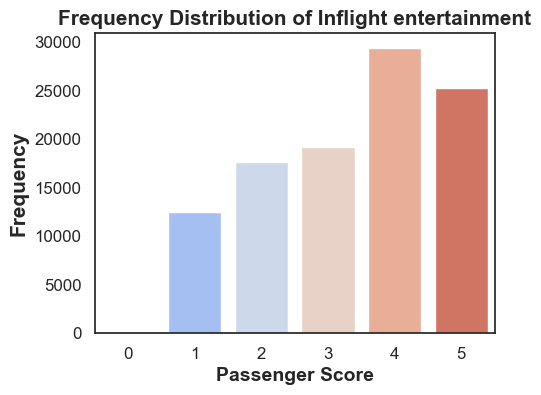

In [349]:
# Visualization of Inflight entertainment feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Inflight entertainment', palette = 'coolwarm')
plt.title('Frequency Distribution of Inflight entertainment',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**On-board service** - Categorical Variable: Ordinal

In [350]:
# On-board service ratio
s = df_train['On-board service']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,30867,0.297072,29.7%
5,23648,0.227595,22.8%
3,22833,0.219751,22.0%
2,14681,0.141294,14.1%
1,11872,0.114259,11.4%
0,3,0.000029,0.0%


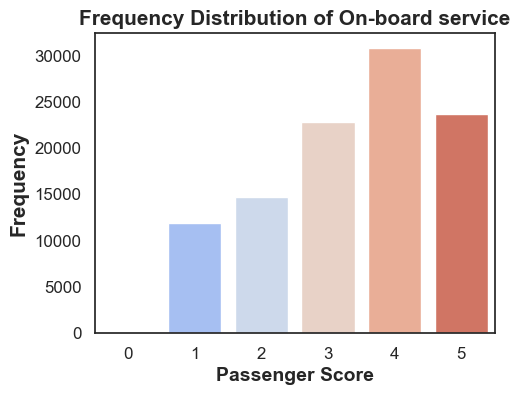

In [351]:
# Visualization of On-board service feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'On-board service', palette = 'coolwarm')
plt.title('Frequency Distribution of On-board service',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Leg room** - Categorical Variable: Ordinal

In [352]:
# leg room ratio
s = df_train['Leg room']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,28789,0.277073,27.7%
5,24667,0.237402,23.7%
3,20098,0.193429,19.3%
2,19525,0.187914,18.8%
1,10353,0.099640,10.0%
0,472,0.004543,0.5%


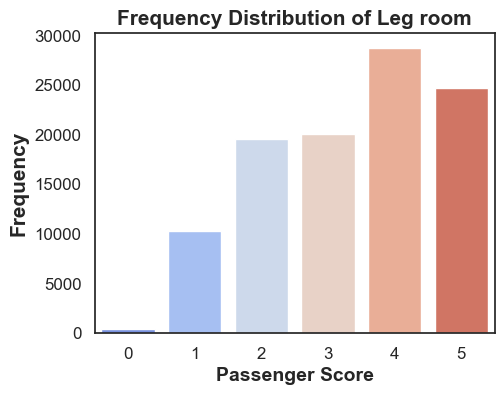

In [353]:
# Visualization of Leg room feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Leg room', palette = 'coolwarm')
plt.title('Frequency Distribution of Leg room',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Baggage handling** - Categorical Variable: Ordinal

In [354]:
# Baggage handling ratio
s = df_train['Baggage handling']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,37383,0.359784,36.0%
5,27131,0.261116,26.1%
3,20632,0.198568,19.9%
2,11521,0.110881,11.1%
1,7237,0.069651,7.0%


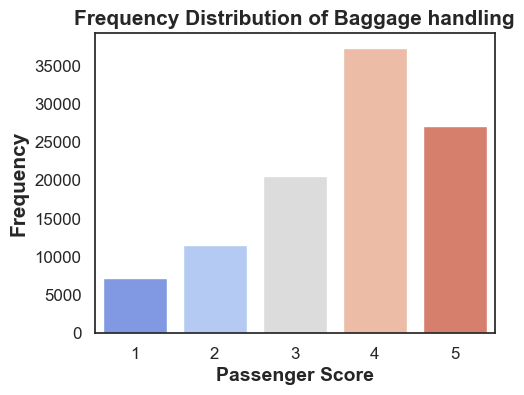

In [355]:
# Visualization of Baggage handling feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Baggage handling', palette = 'coolwarm')
plt.title('Frequency Distribution of Baggage handling',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Check-in service** - Categorical Variable: Ordinal

In [356]:
# Check-in service ratio
s = df_train['Checkin service']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,29055,0.279633,28.0%
3,28446,0.273772,27.4%
5,20619,0.198443,19.8%
2,12893,0.124086,12.4%
1,12890,0.124057,12.4%
0,1,0.000010,0.0%


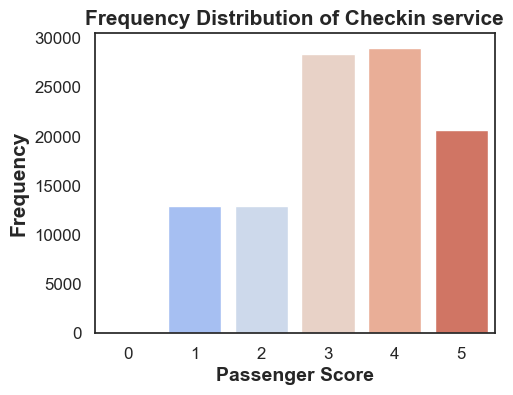

In [357]:
# Visualization of Checkin service feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Checkin service', palette = 'coolwarm')
plt.title('Frequency Distribution of Checkin service',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Inflight service** - Categorical Variable: Ordinal

In [358]:
# Inflight service ratio
s = df_train['Inflight service']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,37945,0.365193,36.5%
5,27116,0.260972,26.1%
3,20299,0.195363,19.5%
2,11457,0.110265,11.0%
1,7084,0.068178,6.8%
0,3,0.000029,0.0%


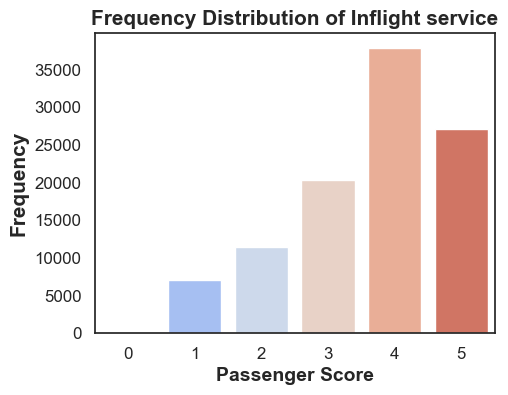

In [359]:
# Visualization of Inflight service
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Inflight service', palette = 'coolwarm')
plt.title('Frequency Distribution of Inflight service',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Cleanliness** - Categorical Variable: Ordinal

In [360]:
# Cleanliness ratio
s = df_train['Cleanliness']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts': counts, 'Percent': percent, '%': percent100})

,Counts,Percent,%
4,27179,0.261578,26.2%
3,24574,0.236507,23.7%
5,22689,0.218365,21.8%
2,16132,0.155259,15.5%
1,13318,0.128176,12.8%
0,12,0.000115,0.0%


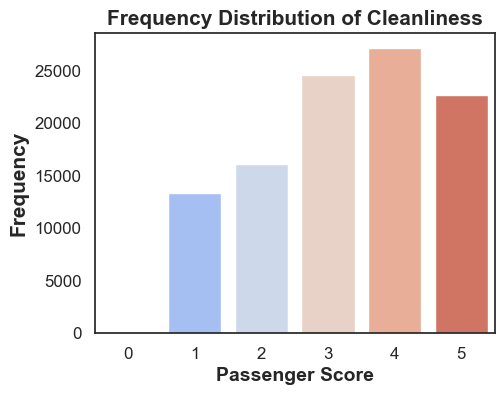

In [361]:
# Visualization of Cleanliness feature
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Cleanliness', palette = 'coolwarm')
plt.title('Frequency Distribution of Cleanliness',weight='bold',fontsize='15')
ax.set_xlabel('Passenger Score', fontsize=14, weight='semibold')
ax.set_ylabel('Frequency', fontsize=15, weight='semibold')
wrap_labels(ax, 10)

### Numerical Variables

**Descriptive Statistics**

In [362]:
df_train[numer_var].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Departure Delay in Minutes,103904.0,14.815618,38.230901,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103594.0,15.178678,38.698682,0.0,0.0,0.0,13.0,1584.0


Departure and Arrival Delay features show large values: 1592 and 1584 respectively. This will be assesed when detecting and treating Outliers in the dataset. 

**Histogram of Numerical Variables**

**Age** - Numerical Variable

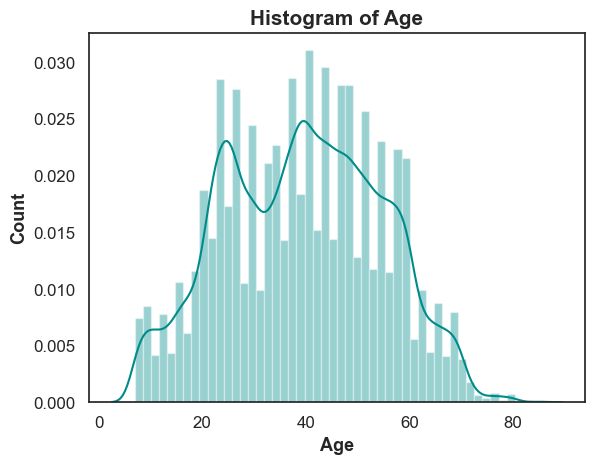

In [363]:
# Histogram of Age feature
sns.distplot(df_train['Age'], hist = True, bins = 50, color = 'darkcyan')
plt.title('Histogram of Age', fontsize=15, weight='semibold')
plt.xlabel('Age', fontsize=13, weight='semibold')
plt.ylabel('Count', fontsize=13, weight='semibold')
plt.show()

**Flight Distance** - Numerical Variable

Text(0, 0.5, 'Frequency')

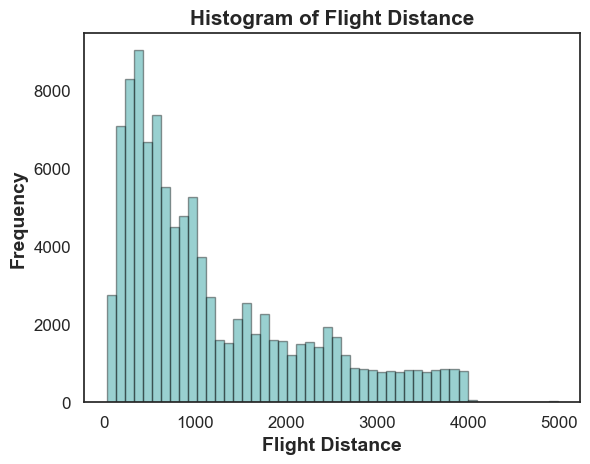

In [364]:
# Histogram of Flight Distance feature
sns.distplot(df_train['Flight Distance'], hist=True, kde=False, 
             bins=(50), color= 'darkcyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth: 4'})

plt.title('Histogram of Flight Distance', fontsize=15, weight='semibold')
plt.xlabel('Flight Distance', fontsize=14, weight='semibold')
plt.ylabel('Frequency', fontsize=14, weight='semibold')

This right-skewed histogram shows that most flights possbly are domestics with a fligh distance under 1000 miles.

**Departure Delay in Minutes** - Numerical Variable

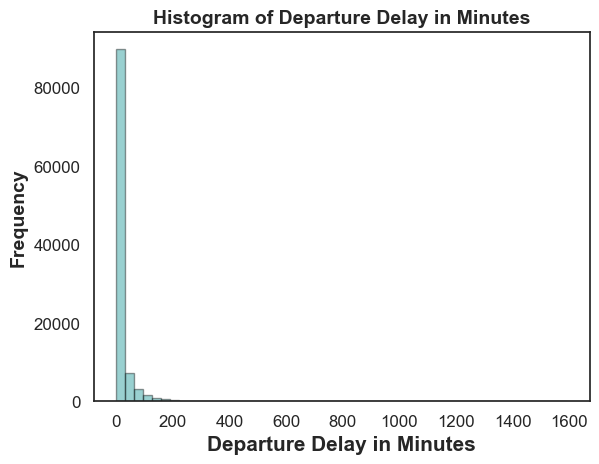

In [365]:
# Histogram of Departure Delay in Minutes feature
sns.distplot(df_train['Departure Delay in Minutes'], hist=True, kde=False, 
             bins=(50), color= 'darkcyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth: 4'})
axd = fig.add_axes([0,0,1,1])
plt.title('Histogram of Departure Delay in Minutes', fontsize=14, weight='semibold')
plt.xlabel('Departure Delay in Minutes', fontsize=15, weight='semibold')
plt.ylabel('Frequency', fontsize=14, weight='semibold')
wrap_labels(axd, 10)

**Arrival Delay in Minutes** - Numerical Variable

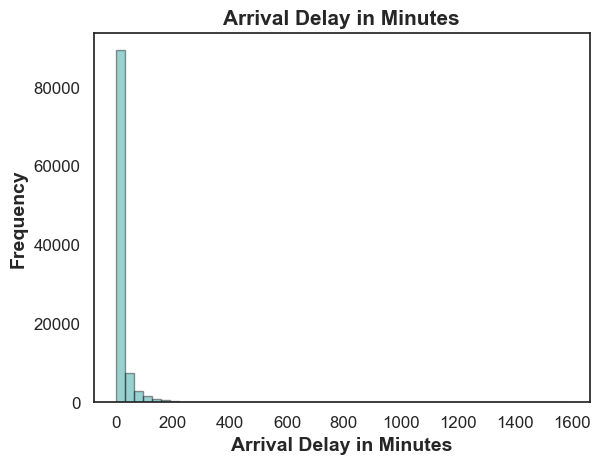

In [366]:
# Histogram of Arrival Delay in Minutes
sns.distplot(df_train['Arrival Delay in Minutes'], hist=True, kde=False, 
             bins=(50), color= 'darkcyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth: 4'})
ax_a = fig.add_axes([0,0,1,1])
plt.title('Arrival Delay in Minutes', fontsize=15, weight='semibold')
plt.xlabel('Arrival Delay in Minutes', fontsize=14, weight='semibold')
plt.ylabel('Frequency', fontsize=14, weight='semibold')
wrap_labels(ax_a, 10)

**Data Cleaning**

**Missing Data - NaN Values**

In [367]:
# Check for missing values in train dataset
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room                               0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Satisfaction                           0
dtype: int64

There are 310 missing values in the Arrival Delay in Minutes variable. To avoid skewing the data, the NaN values will be dropped.

In [368]:
# Check for missing values in test dataset
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room                              0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
Satisfaction                          0
dtype: int64

There are 83 missing values in the Arrival Delay in Minutes variable, which will be dropped.

In [369]:
# Dropping NaN rows in train dataset
df_train = df_train.dropna().copy()

print("The data shape in train dataset is: {}".format(df_train.shape))

The data shape in train dataset is: (103594, 23)


In [370]:
# Dropping NaN rows in test dataset
df_test = df_test.dropna().copy()

print("The data shape in test dataset is: {}".format(df_test.shape))

The data shape in test dataset is: (25893, 23)


**Duplicate Values**

In [371]:
# Looking for duplicate values
df_train.duplicated().any()

False

There are no duplicate values in the dataset.

**Outliers**

In [372]:
# Looking for outliers
# numer_features = df_train.select_dtypes(exclude=['object'])
df_train[numer_var].columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

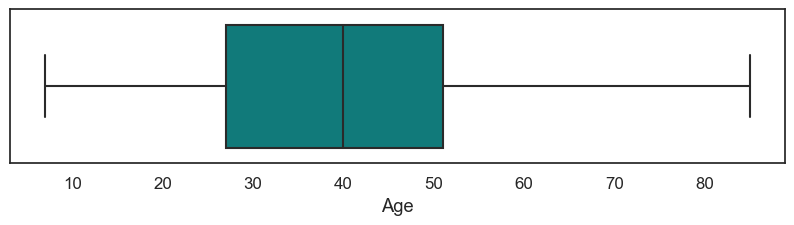

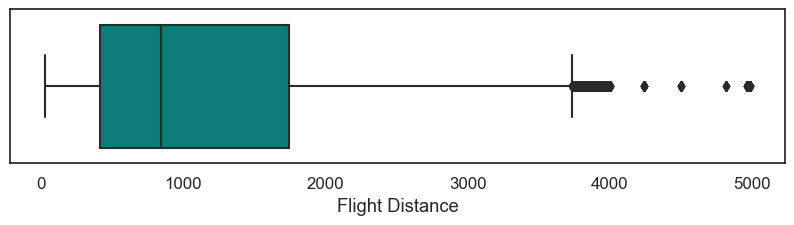

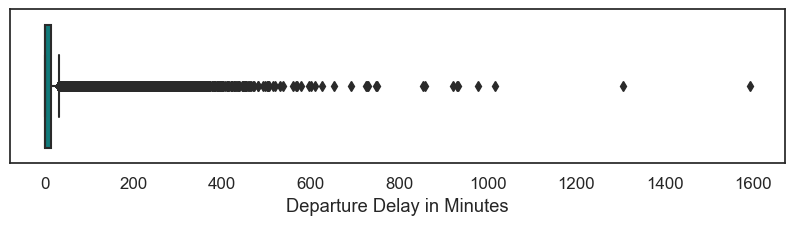

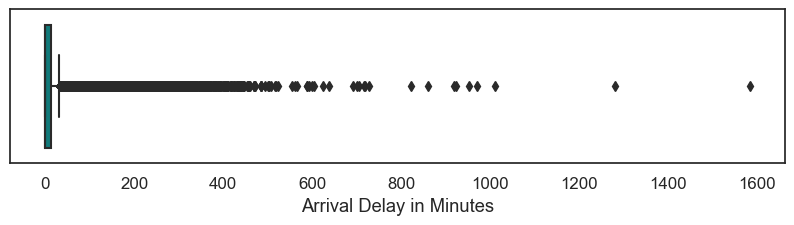

In [373]:
for column in numer_var:
    plt.figure(figsize=(10,2))
    sns.boxplot(data = df_train, x = column, color= 'darkcyan')

Here and from the descriptives statistics table, we can see that there are large values for the Departure Delay in Minutes and Arrival Delay in Minutes: 1592 and 1584 respectively.

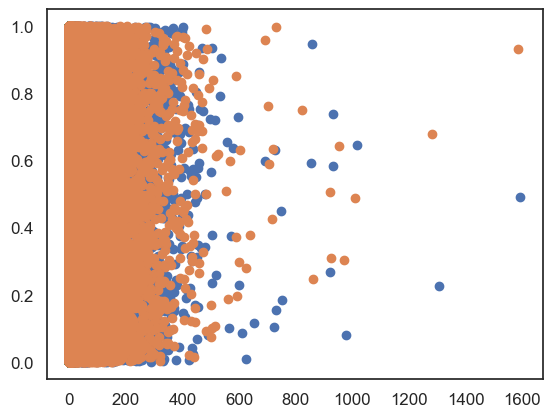

In [374]:
plt.scatter(df_train['Departure Delay in Minutes'], np.random.rand(df_train.shape[0]))
plt.scatter(df_train['Arrival Delay in Minutes'], np.random.rand(df_train.shape[0]))

Those extreme values are not errors, and are they seem to be a natural part for the dataset. For this reason, the outliers will not be removed from the dataset.

### **2. Bivariate Analysis**

Customer Satisfaction level in relation to the **Categorical Variables**

**Customer Satisfaction level by Gender**

In [375]:
# Percentage of Customer Satisfaction in relation to Gender 
pd.crosstab(df_train['Gender'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,29.1%,21.7%
Male,27.6%,21.6%


Around 57% passengers are not satisfied with the service. 

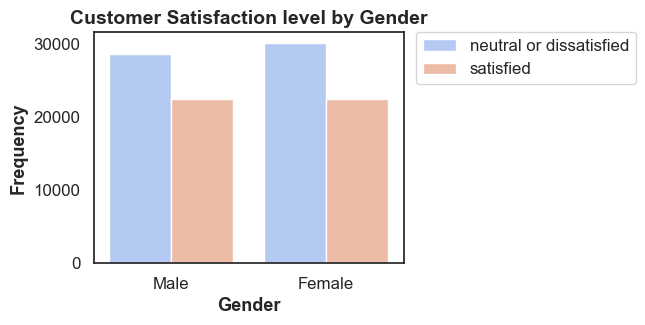

In [376]:
# Visualization of the Customer Satisfaction in relation to Gender 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Gender', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Gender',weight='bold',fontsize='14')
plt.xlabel('Gender', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that there is a similar distribution of the neutral/dissatisfied and satisfied airline customers, with a high number of neutral/dissatisfied customers in both male and female.

**Customer Satisfaction level by Customer Type**

In [377]:
# Percentage of Customer Satisfaction in relation to Customer Type
pd.crosstab(df_train['Customer Type'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
First-time Customer,13.9%,4.3%
Loyal Customer,42.7%,39.0%


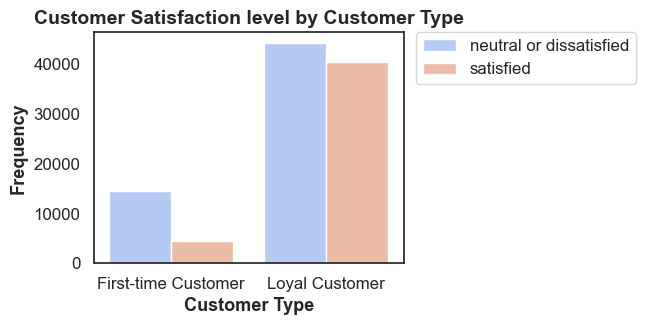

In [378]:
# Visualization of the Customer Satisfaction in relation to Customer Type
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Customer Type', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Customer Type',weight='bold',fontsize='14')
plt.xlabel('Customer Type', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that among the Loyal customers, there is a similar ratio between neutral/dissatisfied (43%) and satisfied (39%) airline customers.

**Customer Satisfaction level by Type of Travel**

In [379]:
# Percentage of Customer Satisfaction in relation to Type of Travel
pd.crosstab(df_train['Type of Travel'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,28.8%,40.2%
Personal Travel,27.9%,3.1%


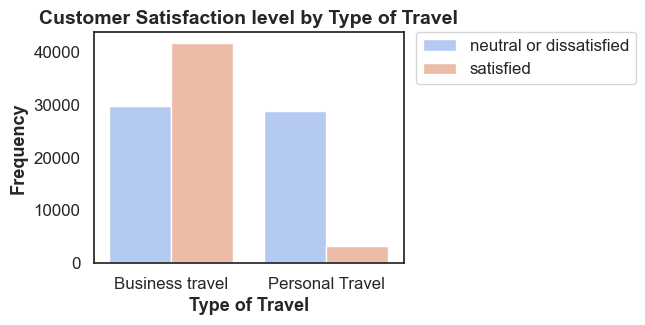

In [380]:
# Visualization of the Customer Satisfaction in relation to Type of Travel
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Type of Travel', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Type of Travel',weight='bold',fontsize='14')
plt.xlabel('Type of Travel', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that among Business customers, there is a large amount of customers that are satisfied with the service provided. On the other hand, among customers with a Personal type of travel, there is a large amount of customers that found the service deficient. 

**Customer Satisfaction level by Class**

In [381]:
# Percentage of Customer Satisfaction in relation to Class 
pd.crosstab(df_train['Class'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,14.6%,33.2%
Economy,42.0%,10.1%


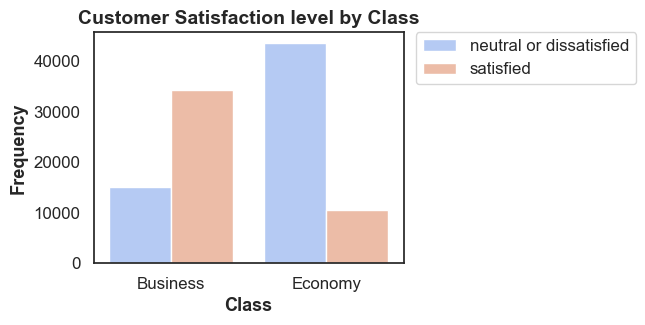

In [382]:
# Visualization of the Customer Satisfaction in relation to Class 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Class', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Class', weight='bold',fontsize='14')
plt.xlabel('Class', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows the predominance of customers satisfied in the Business class comparing with the large amount of neutral/dissatisfied customers in the Economy class.

**Customer Satisfaction level by Inflight wifi service**

In [383]:
# Percentage of Customer Satisfaction in relation to Inflight wifi service
pd.crosstab(df_train['Inflight wifi service'], df_train['Satisfaction'])

Satisfaction,neutral or dissatisfied,satisfied
Inflight wifi service,,
0,8,3088
1,11995,5786
2,19346,6409
3,19327,6462
4,7915,11822
5,106,11330


In [384]:
# Percentage of Customer Satisfaction in relation to Inflight wifi service 
pd.crosstab(df_train['Inflight wifi service'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Inflight wifi service,,
0,0.0%,3.0%
1,11.6%,5.6%
2,18.7%,6.2%
3,18.7%,6.2%
4,7.6%,11.4%
5,0.1%,10.9%


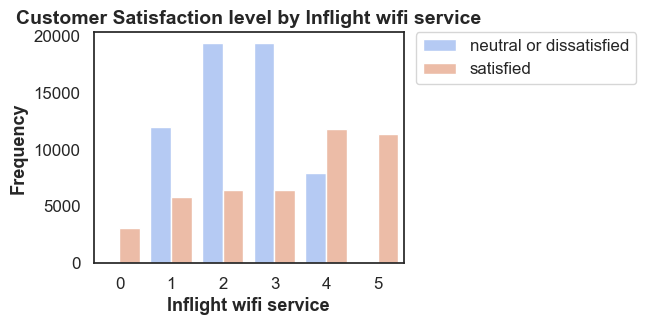

In [385]:
# Visualization of the Customer Satisfaction in relation to Inflight wifi service 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Inflight wifi service', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Inflight wifi service',weight='bold',fontsize='14')
plt.xlabel('Inflight wifi service', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that there is a high level of customer dissatisfaction when the Inflight wifi service is rated as poor service (rate below 3).

**Customer Satisfaction level by Departure/Arrival time convenient**

In [386]:
# Percentage of Customer Satisfaction in relation to Departure/Arrival time convenient
pd.crosstab(df_train['Departure/Arrival time convenient'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Departure/Arrival time convenient,,
0,2.7%,2.4%
1,7.7%,7.3%
2,9.2%,7.4%
3,9.7%,7.6%
4,15.1%,9.5%
5,12.4%,9.2%


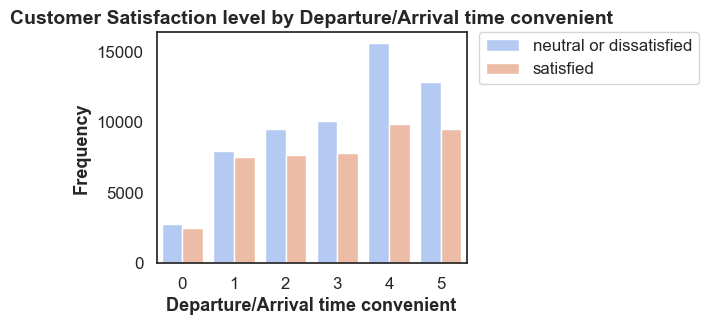

In [387]:
# Visualization of the Customer Satisfaction in relation to Departure/Arrival time convenient
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Departure/Arrival time convenient', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Departure/Arrival time convenient',weight='bold',fontsize='14')
plt.xlabel('Departure/Arrival time convenient', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that, in general, there is a high level of customer dissatisfaction in all the rated values, even when the Departure/Arrival time is rated as extremely convenient. This feature may have a limited impact on Satisfaction.

**Customer Satisfaction level by Ease of Online booking**

In [388]:
# Percentage of Customer Satisfaction in relation to Ease of Online booking 
pd.crosstab(df_train['Ease of Online booking'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Ease of Online booking,,
0,1.4%,2.9%
1,10.5%,6.3%
2,16.1%,7.0%
3,16.3%,7.3%
4,8.8%,10.0%
5,3.5%,9.8%


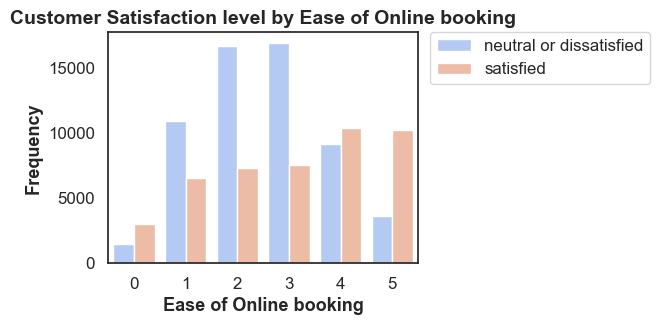

In [389]:
# Visualization of the Customer Satisfaction in relation to Ease of Online booking 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Ease of Online booking', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Ease of Online booking',weight='bold',fontsize='14')
plt.xlabel('Ease of Online booking', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that the level of customer satisfaction is high when the Ease of Online booking rate is above 4.

**Customer Satisfaction level by Gate location**

In [390]:
# Percentage of Customer Satisfaction in relation to Gate location
pd.crosstab(df_train['Gate location'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Gate location,,
0,0.0%,0.0%
1,8.5%,8.4%
2,10.1%,8.6%
3,18.0%,9.5%
4,14.4%,9.1%
5,5.7%,7.6%


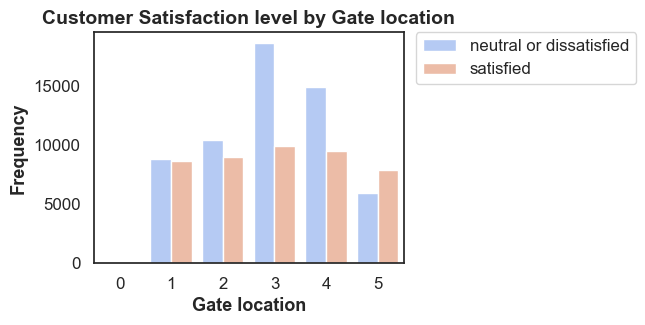

In [391]:
# Visualization of the Customer Satisfaction in relation to Gate location
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Gate location', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Gate location',weight='bold',fontsize='14')
plt.xlabel('Gate location', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that the level of customer satisfaction is low even when the Gate location is rated as extremely convenient (score 5). This feature may have a limited impact on Satisfaction.

**Customer Satisfaction level by Food and drink**

In [392]:
# Percentage of Customer Satisfaction in relation to Food and drink 
pd.crosstab(df_train['Food and drink'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'


Satisfaction,neutral or dissatisfied,satisfied
Food and drink,,
0,0.1%,0.0%
1,9.9%,2.5%
2,12.9%,8.2%
3,13.0%,8.5%
4,11.1%,12.3%
5,9.7%,11.8%


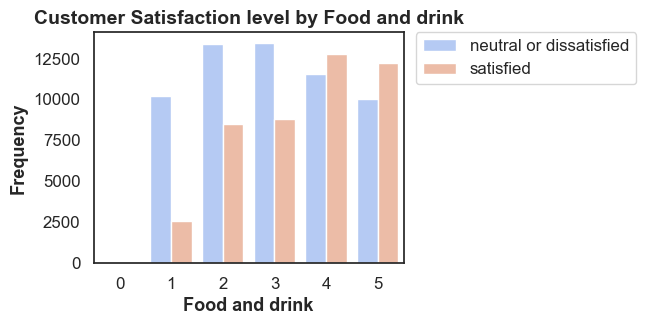

In [393]:
# Visualization of the Customer Satisfaction in relation to Food and drink 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Food and drink', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Food and drink',weight='bold',fontsize='14')
plt.xlabel('Food and drink', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that there is a high level of customer satisfaction when the Food and drink rate is above 4.

**Customer Satisfaction level by Online boarding**

In [394]:
# Percentage of Customer Satisfaction in relation to Online boarding 
pd.crosstab(df_train['Online boarding'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'


Satisfaction,neutral or dissatisfied,satisfied
Online boarding,,
0,1.0%,1.3%
1,8.9%,1.4%
2,14.9%,1.9%
3,18.1%,2.9%
4,11.2%,18.4%
5,2.6%,17.4%


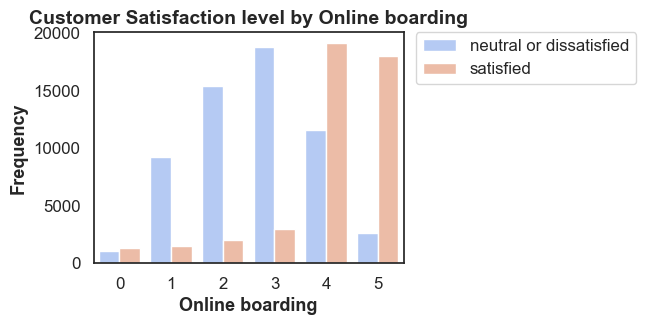

In [395]:
# Visualization of the Customer Satisfaction in relation to Online boarding 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Online boarding', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Online boarding',weight='bold',fontsize='14')
plt.xlabel('Online boarding', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that there is a high level of customer satisfaction when the Online boarding is considered extremely good (scores above 4).

**Customer Satisfaction level by Seat comfort**

In [396]:
# Percentage of Customer Satisfaction in relation to Seat comfort
pd.crosstab(df_train['Seat comfort'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'


Satisfaction,neutral or dissatisfied,satisfied
Seat comfort,,
0,0.0%,0.0%
1,9.0%,2.6%
2,11.1%,3.2%
3,14.2%,3.8%
4,13.4%,17.2%
5,8.9%,16.6%


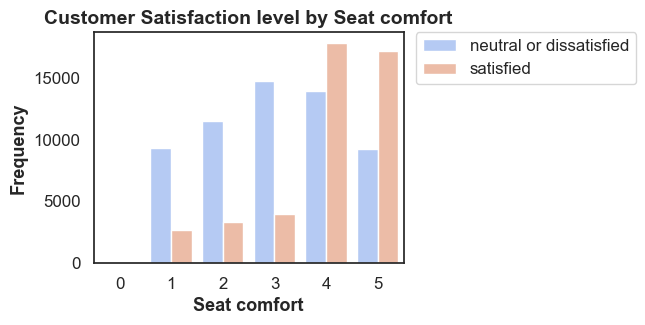

In [397]:
# Visualization of the Customer Satisfaction in relation to Seat comfort 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Seat comfort', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Seat comfort',weight='bold',fontsize='14')
plt.xlabel('Seat comfort', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that, in general, airline customers perceived a high level of customer satisfaction when rated the seat as extremely comfortable (score above 4).

**Customer Satisfaction level by Inflight entertainment**

In [398]:
# Percentage of Customer Satisfaction in relation to Inflight entertainment
pd.crosstab(df_train['Inflight entertainment'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Inflight entertainment,,
0,0.0%,0.0%
1,10.3%,1.7%
2,13.3%,3.6%
3,13.5%,5.0%
4,11.0%,17.3%
5,8.5%,15.7%


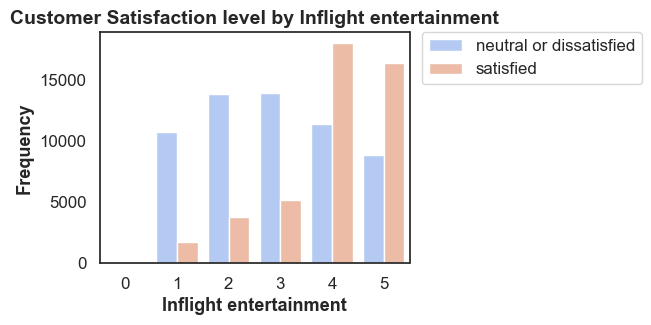

In [399]:
# Visualization of the Customer Satisfaction in relation to Inflight entertainment 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Inflight entertainment', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Inflight entertainment',weight='bold',fontsize='14')
plt.xlabel('Inflight entertainment', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

**Customer Satisfaction level by On-board service**

In [400]:
# Percentage of Customer Satisfaction in relation to On-board service 
pd.crosstab(df_train['On-board service'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
On-board service,,
0,0.0%,0.0%
1,9.2%,2.2%
2,10.5%,3.6%
3,15.0%,6.9%
4,13.8%,16.0%
5,8.1%,14.6%


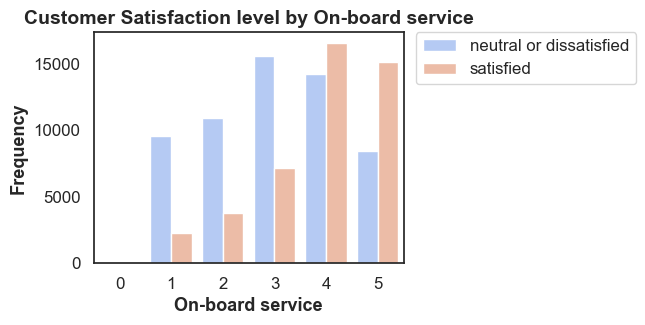

In [401]:
# Visualization of the Customer Satisfaction in relation to On-board service 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'On-board service', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by On-board service',weight='bold',fontsize='14')
plt.xlabel('On-board service', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that there is a high level of customer satisfaction when the On-board service is extremely good, with a rate above 4.

**Customer Satisfaction level by Leg room**

In [402]:
# Percentage of Customer Satisfaction in relation to leg room 
pd.crosstab(df_train['Leg room'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Leg room,,
0,0.3%,0.2%
1,7.9%,2.0%
2,13.6%,5.2%
3,14.1%,5.3%
4,11.6%,16.1%
5,9.2%,14.6%


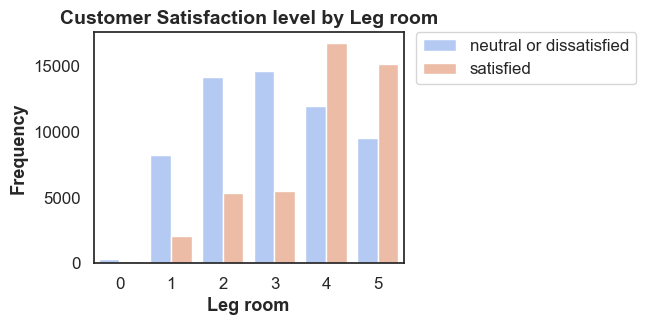

In [403]:
# Visualization of the Customer Satisfaction in relation to Leg room 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Leg room', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Leg room',weight='bold',fontsize='14')
plt.xlabel('Leg room', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that there is a high level of customer satisfaction when the Leg room service is extremely good, with a rate above 4.

**Customer Satisfaction level by Baggage handling**

In [404]:
# Percentage of Customer Satisfaction in relation to Baggage handling 
pd.crosstab(df_train['Baggage handling'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Baggage handling,,
1,4.9%,2.1%
2,7.8%,3.3%
3,15.2%,4.7%
4,18.7%,17.3%
5,10.1%,16.0%


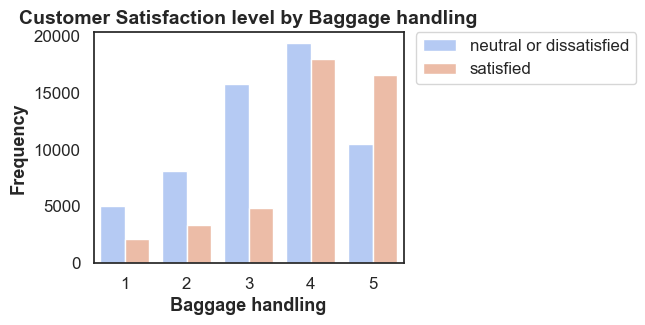

In [405]:
# Visualization of the Customer Satisfaction in relation to Baggage handling 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Baggage handling', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Baggage handling',weight='bold',fontsize='14')
plt.xlabel('Baggage handling', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

**Customer Satisfaction level by Checkin service**

In [406]:
# Percentage of Customer Satisfaction in relation to Checkin service 
pd.crosstab(df_train['Checkin service'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Checkin service,,
0,0.0%,0.0%
1,9.4%,3.0%
2,9.3%,3.1%
3,15.1%,12.3%
4,15.1%,12.9%
5,7.7%,12.1%


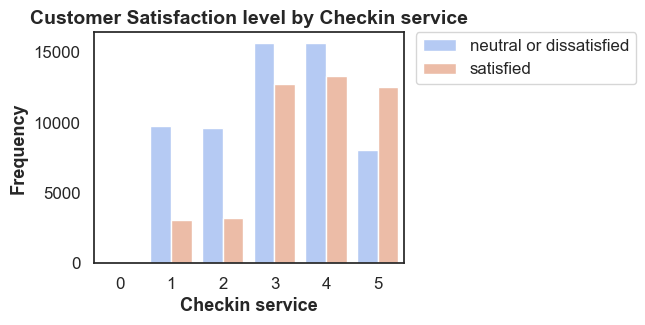

In [407]:
# Visualization of the Customer Satisfaction in relation to Checkin service 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Checkin service', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Checkin service',weight='bold',fontsize='14')
plt.xlabel('Checkin service', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that, in general, there is a high level of customer dissatisfaction when the Check-in service is deficient (rate below 4).

**Customer Satisfaction level by Inflight service**

In [408]:
# Percentage of Customer Satisfaction in relation to Inflight service 
pd.crosstab(df_train['Inflight service'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Inflight service,,
0,0.0%,0.0%
1,4.8%,2.0%
2,7.7%,3.3%
3,14.9%,4.7%
4,19.1%,17.5%
5,10.2%,15.9%


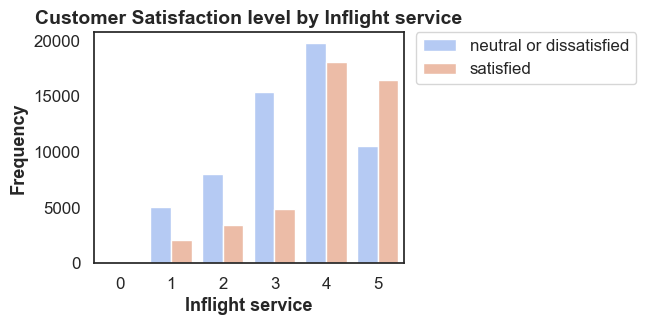

In [409]:
# Visualization of the Customer Satisfaction in relation to Inflight service 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Inflight service', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Inflight service',weight='bold',fontsize='14')
plt.xlabel('Inflight service', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that there is a high level of customer satisfaction when the Inflight service is extremely good, with a rate above 4.

**Customer Satisfaction level by Cleanliness**

In [410]:
# Percentage of Customer Satisfaction in relation to Cleanliness 
pd.crosstab(df_train['Cleanliness'], df_train['Satisfaction'], normalize = True).mul(100).round(1).astype(str) + '%'

Satisfaction,neutral or dissatisfied,satisfied
Cleanliness,,
0,0.0%,0.0%
1,10.3%,2.5%
2,12.2%,3.3%
3,13.4%,10.2%
4,12.2%,14.0%
5,8.5%,13.3%


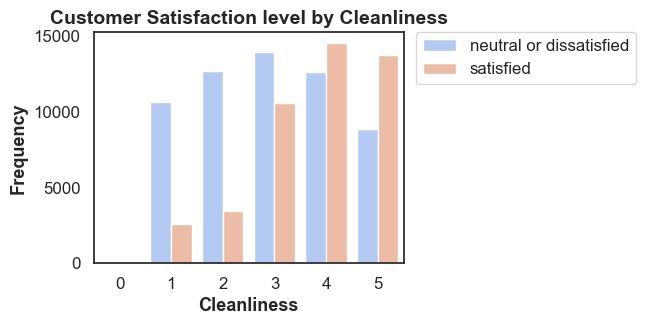

In [411]:
# Visualization of the Customer Satisfaction in relation to Cleanliness 
sns.set(style='white',font_scale=1.1)
fig_st = plt.figure(figsize=(4,3))
axe = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train, x = 'Cleanliness', hue = 'Satisfaction', palette = 'coolwarm')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Customer Satisfaction level by Cleanliness',weight='bold',fontsize='14')
plt.xlabel('Cleanliness', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
wrap_labels(axe, 10)

This plot shows that the level of customer satisfaction is high when the Cleanliness score is above 4.

Customer Satisfaction level in relation to the **Numerical Variables**

**Customer Satisfaction level by Age**

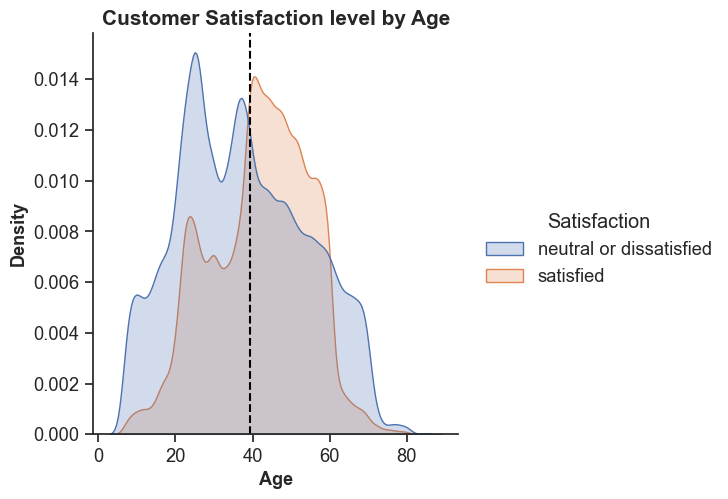

In [412]:
# Visualization of the Customer Satisfaction in relation to Age 
sns.set(font_scale = 1.2)
sns.set_style('ticks')
sns.displot(data = df_train, x = 'Age', hue = 'Satisfaction', kind = 'kde', bw_adjust = 0.75, fill = True)
plt.axvline(df_train['Age'].mean(), ls = '--', color = 'black')
plt.title('Customer Satisfaction level by Age', fontsize=15, weight='semibold')
plt.xlabel('Age', fontsize=13, weight='semibold')
plt.ylabel('Density', fontsize=13, weight='semibold')
sns.despine()

This density plot shows that in the age range between 40 and 60, the number of satisfied customers is higher than the neutral/dissatisfied custommers.

**Customer Satisfaction level by Flight Distance**

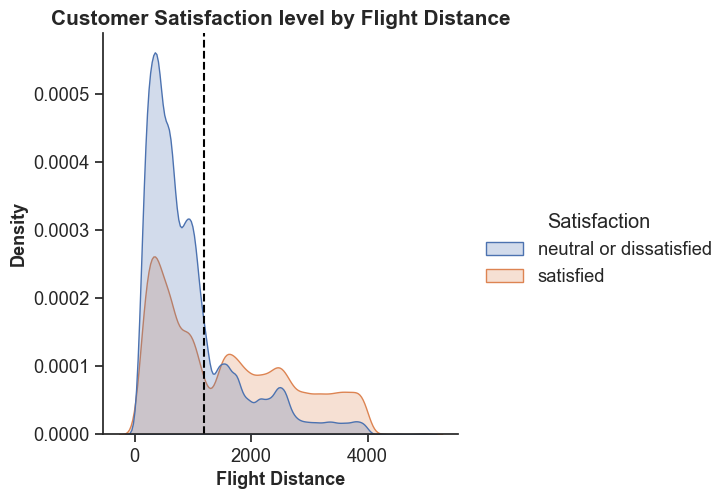

In [413]:
# Visualization of the Customer Satisfaction in relation to Flight Distance 
sns.set(font_scale = 1.2)
sns.set_style('ticks')
sns.displot(data = df_train, x = 'Flight Distance', hue = 'Satisfaction', kind = 'kde', bw_adjust = 0.75, fill = True)
plt.axvline(df_train['Flight Distance'].mean(), ls = '--', color = 'black')
plt.title('Customer Satisfaction level by Flight Distance', fontsize=15, weight='semibold')
plt.xlabel('Flight Distance', fontsize=13, weight='semibold')
plt.ylabel('Density', fontsize=13, weight='semibold')
sns.despine()

This plot shows that the level of customer dissatisfaction is high in customers that travelled approximately less than 1100 miles (approx mean). On the other hand, there is a significant level of customer satisfaction in long distance flight (more than approx. 1100 miles).

**Customer Satisfaction level by Departure Delay in Minutes**

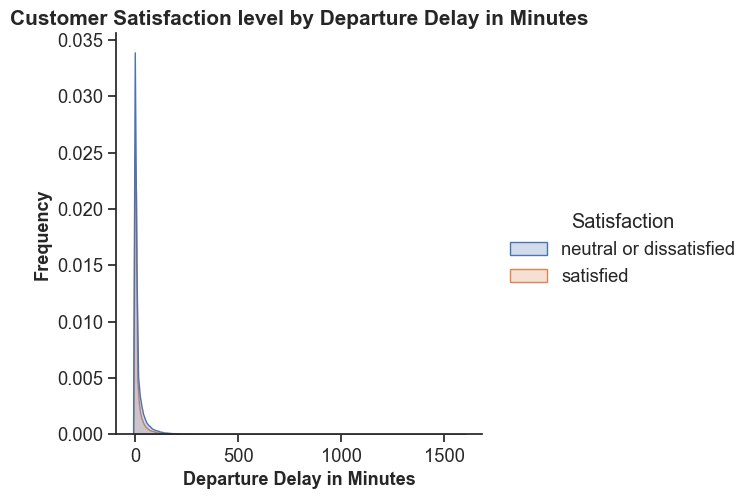

In [414]:
# Visualization of the Customer Satisfaction in relation to Departure Delay in Minutes 
sns.set(font_scale = 1.2)
sns.set_style('ticks')
sns.displot(data = df_train, x = 'Departure Delay in Minutes', hue = 'Satisfaction', kind = 'kde', bw_adjust = 0.75, fill = True)
plt.title('Customer Satisfaction level by Departure Delay in Minutes', fontsize=15, weight='semibold')
plt.xlabel('Departure Delay in Minutes', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
sns.despine()

**Customer Satisfaction level by Arrival Delay in Minutes**

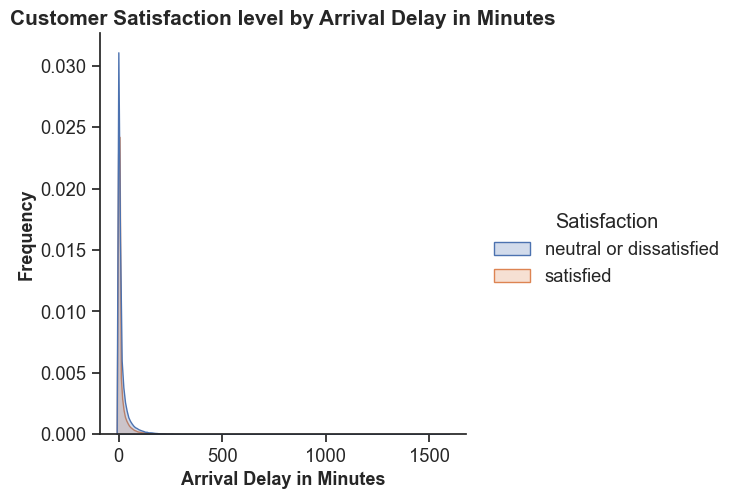

In [415]:
# Visualization of the Customer Satisfaction in relation to Arrival Delay in Minutes 
sns.set(font_scale = 1.2)
sns.set_style('ticks')
sns.displot(data = df_train, x = 'Arrival Delay in Minutes', hue = 'Satisfaction', kind = 'kde', bw_adjust = 0.75, fill = True)
plt.title('Customer Satisfaction level by Arrival Delay in Minutes', fontsize=15, weight='semibold')
plt.xlabel('Arrival Delay in Minutes', fontsize=13, weight='semibold')
plt.ylabel('Frequency', fontsize=13, weight='semibold')
sns.despine()

### **3. Multivariate Analysis**

**Customer Satisfaction level in relation to Class by Type of Travel**

<Figure size 400x300 with 0 Axes>

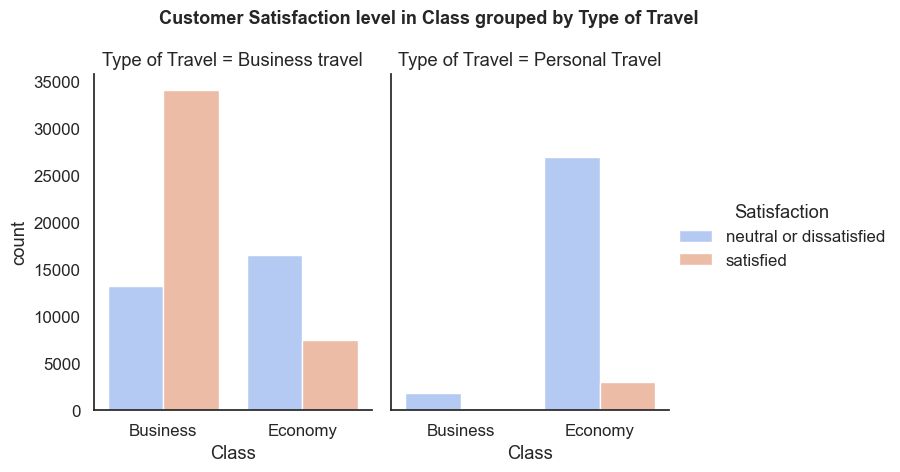

In [416]:
# Visualization of the Customer Satisfaction in relation to Class by Type of Travel 
sns.set(style='white',font_scale=1.1)
fig_ct = plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Class', hue = 'Satisfaction', kind = 'count', col = 'Type of Travel', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Class grouped by Type of Travel', y = 1.05, weight='bold', fontsize = 13)
wrap_labels(axt, 10)

plt.show()

This plot confirms that customers with Business Type of Travel, and who travel in Business Class, are likely more satisfied than the customers with Personal Type of Travel who go in Business Class. 

**Customer Satisfaction level in relation to Inflight wifi service by Type of Travel**

<Figure size 400x300 with 0 Axes>

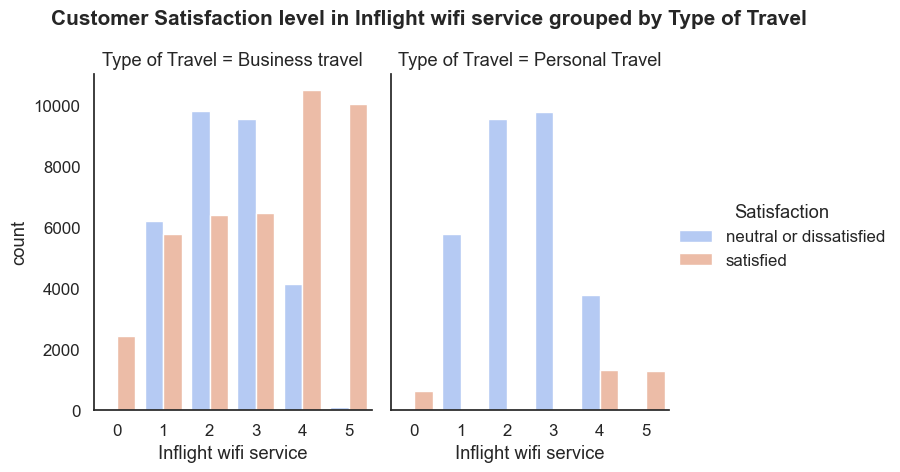

In [417]:
# Visualization of the Customer Satisfaction in relation to Inflight wifi service by Type of Travel 
sns.set(style='white',font_scale=1.1)
fig_ct = plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Inflight wifi service', hue = 'Satisfaction', kind = 'count', col = 'Type of Travel', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Inflight wifi service grouped by Type of Travel', y = 1.05, weight='bold', fontsize = 15)
wrap_labels(axt, 10)

plt.show()

This plot shows that when customers with Business Type of Travel rates the Inflight wi-fi service between 1 and 3, the level of customer disatisfaction increases. Similarly, customers with Personal Type of Travel are more likely dissatisfied with rates between 1 and 3.

**Customer Satisfaction level in relation to Food and drink by Type of Travel**

<Figure size 400x300 with 0 Axes>

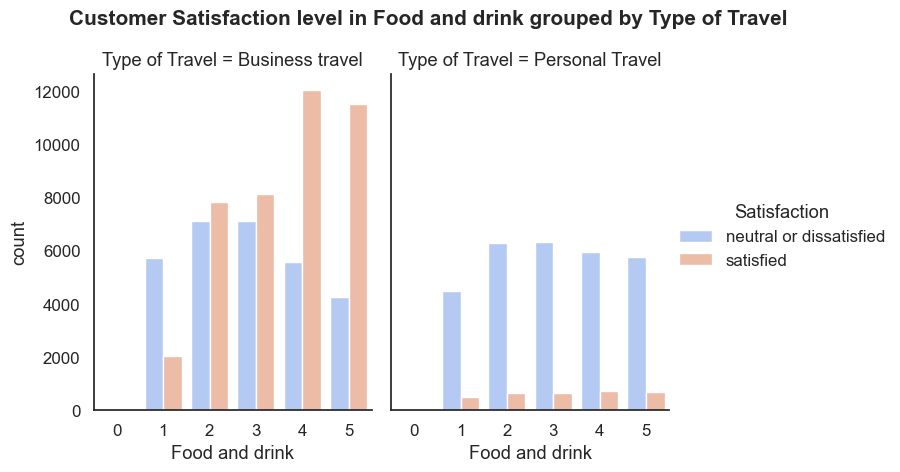

In [418]:
# Visualization of the Customer Satisfaction in relation to Food and drink by Type of Travel 
sns.set(style='white',font_scale=1.1)
fig_ct = plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Food and drink', hue = 'Satisfaction', kind = 'count', col = 'Type of Travel', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Food and drink grouped by Type of Travel', y = 1.05, weight='bold', fontsize = 15)
wrap_labels(axt, 10)

plt.show()

This plot shows that for Customer with Business Type of Travel, there is a high level of customer satisfaction when the Food and drink service is high rated, as should be expected.

**Customer Satisfaction level in relation to Seat comfort by Type of Travel**

<Figure size 400x300 with 0 Axes>

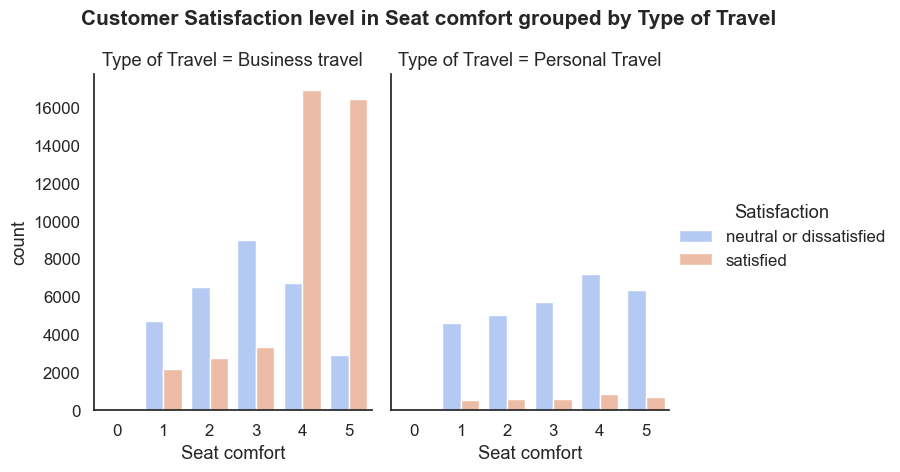

In [419]:
# Visualization of the Customer Satisfaction in relation to Seat comfort by Type of Travel 
sns.set(style='white',font_scale=1.1)
fig_ct = plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Seat comfort', hue = 'Satisfaction', kind = 'count', col = 'Type of Travel', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Seat comfort grouped by Type of Travel', y = 1.05, weight='bold', fontsize = 15)
wrap_labels(axt, 10)

plt.show()

**Customer Satisfaction level in relation to Seat comfort by Class**

<Figure size 400x300 with 0 Axes>

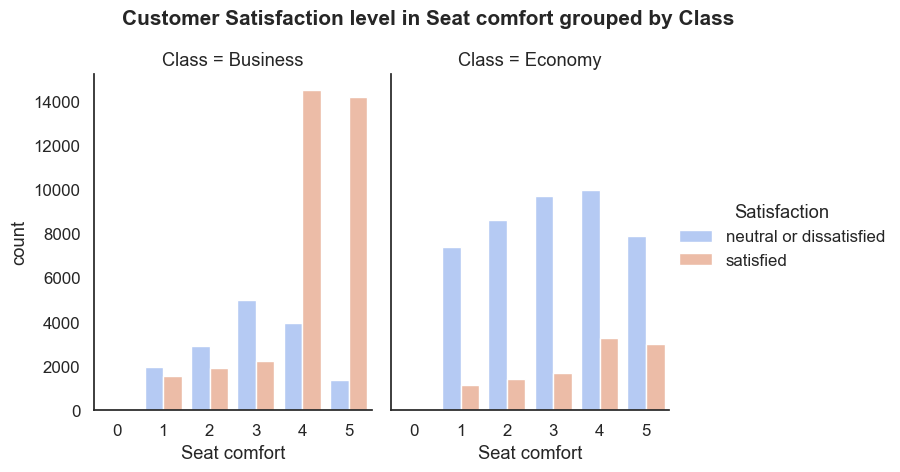

In [420]:
# Visualization of the Customer Satisfaction in relation to Seat comfort by Class 
sns.set(style='white',font_scale=1.1)
fig_ct = plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Seat comfort', hue = 'Satisfaction', kind = 'count', col = 'Class', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Seat comfort grouped by Class', y = 1.05, weight='bold', fontsize = 15)
wrap_labels(axt, 10)

plt.show()

This plot confirms that for Business Class, the level of customer stisfaction is high when the seat is rated as extremely comfortable. 

**Customer Satisfaction level in relation to Inflight entertainment by Class**

<Figure size 400x300 with 0 Axes>

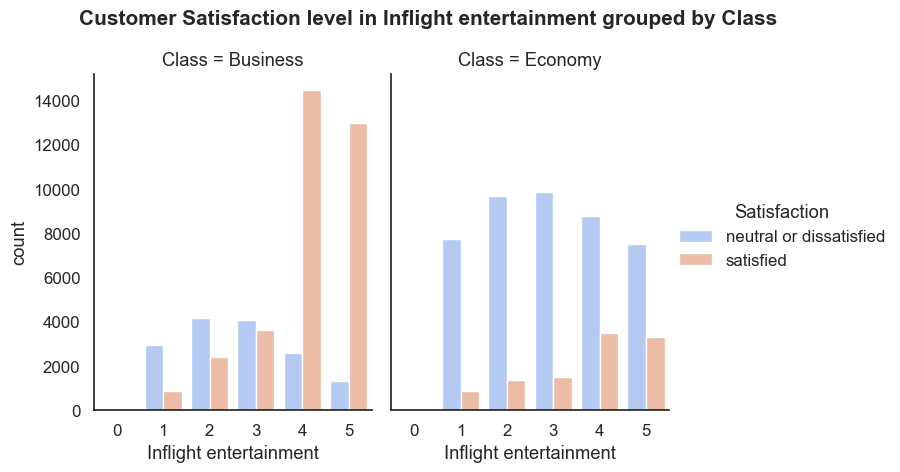

In [421]:
# Visualization of the Customer Satisfaction in relation to Inflight entertainment by Class
sns.set(style='white',font_scale=1.1)
fig_ct = plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Inflight entertainment', hue = 'Satisfaction', kind = 'count', col = 'Class', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Inflight entertainment grouped by Class', y = 1.05, weight='bold', fontsize = 15)
wrap_labels(axt, 10)

plt.show()

This plot shows that the Inflight entertainment follows the same pattern as the Seat Comfort. For Business Class customers, there is a high level of customer satisfaction when the Inflight entertainment service is rated highly. On the other hand, Economy Class customers maintain a similar level of dissatisfaction regardless of their rating.

**Customer Satisfaction level in relation to Type of Travel and Flight Distance by Class**

<Figure size 400x300 with 0 Axes>

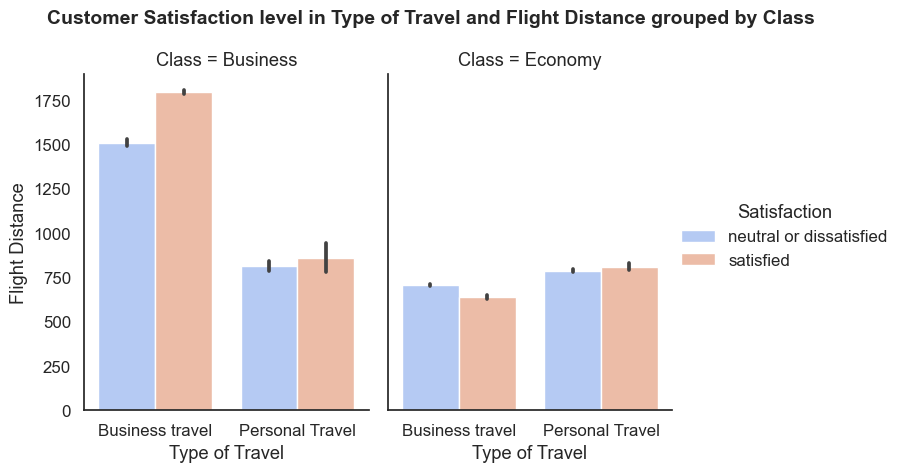

In [422]:
# Visualization of the Customer Satisfaction in relation to Type of Travel and Flight Distance by Class 
sns.set(style='white',font_scale=1.1)
plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Type of Travel', y = 'Flight Distance', hue = 'Satisfaction', col = 'Class', kind = 'bar', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Type of Travel and Flight Distance grouped by Class', y = 1.05, weight='bold', fontsize = 14)
wrap_labels(axt, 10)

plt.show()

This plot shows that for customers in Business Type of Travel who travel in Business Class, there is a higher level of customer satisfaction for longer Flight Distance.

**Customer Satisfaction level in relation to Departure/Arrival Time Convenient and Online Boarding by Class**

<Figure size 400x300 with 0 Axes>

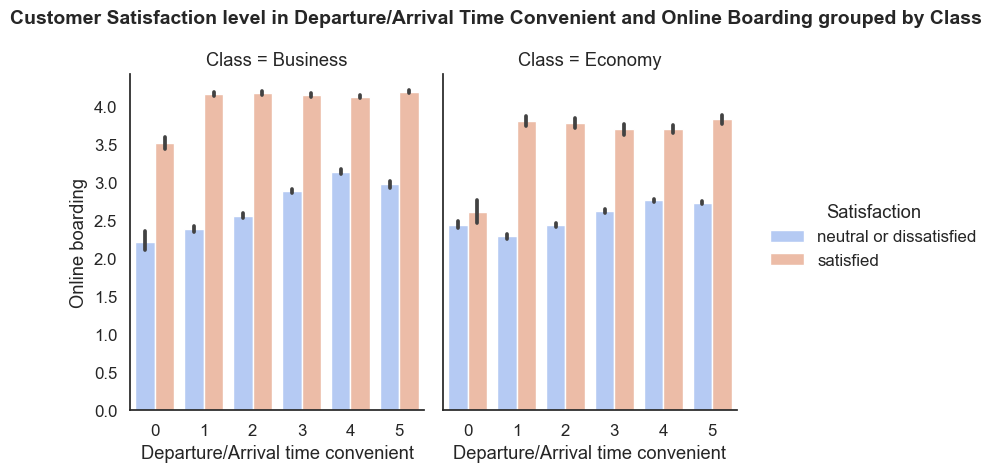

In [423]:
# Visualization of the Customer Satisfaction in relation to Departure/Arrival Time Convenient and Online Boarding by Class
sns.set(style='white',font_scale=1.1)
plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Departure/Arrival time convenient', y = 'Online boarding', hue = 'Satisfaction', col = 'Class', kind = 'bar', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Departure/Arrival Time Convenient and Online Boarding grouped by Class', y = 1.05, weight='bold', fontsize = 14)
wrap_labels(axt, 10)

plt.show()

This plot shows that, in general, for both Business and Economy Class, there is a high level of customer satisfaction when doing Online boarding even when the Departure/arrival time is inconvenient. 

**Customer Satisfaction level in relation to Class and Departure Delay in Minutes by Type of Travel**

<Figure size 400x300 with 0 Axes>

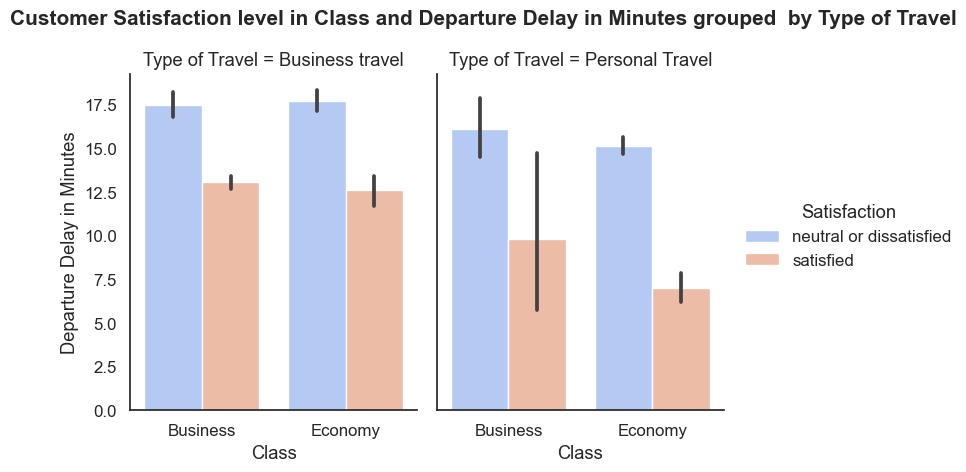

In [424]:
# Visualization of the Customer Satisfaction level in relation to Class and Departure Delay in Minutes by Type of Travel
sns.set(style='white',font_scale=1.1)
fig_ct = plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Class', y ='Departure Delay in Minutes', hue = 'Satisfaction', kind = 'bar', col = 'Type of Travel', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Class and Departure Delay in Minutes grouped  by Type of Travel', y = 1.05, weight='bold', fontsize = 15)
wrap_labels(axt, 10)

plt.show()

This plot shows that for Personal Type of Travel, there is a high level of customer dissatisfaction when the Departure Delay in minutes is high.

**Customer Satisfaction level in relation to Class and Arrival Delay in Minutes by Type of Travel**

<Figure size 400x300 with 0 Axes>

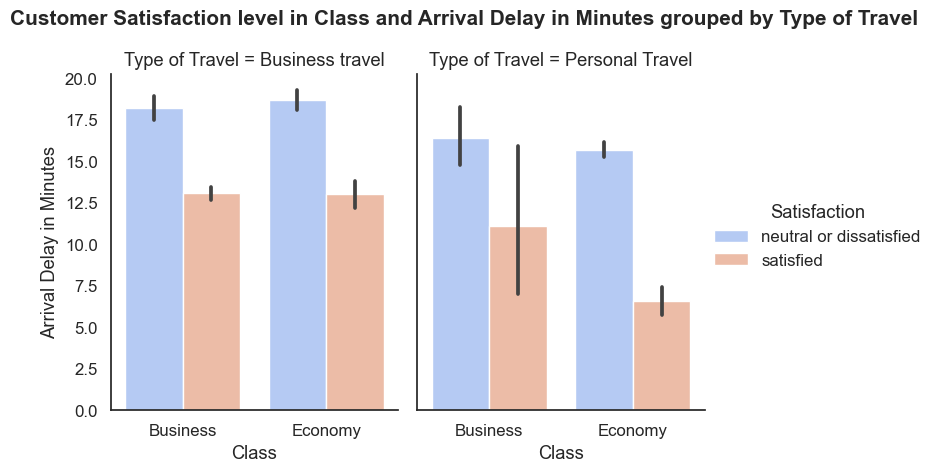

In [425]:
# Visualization of the Customer Satisfaction level in relation to Class and Arrival Delay in Minutes by Type of Travel
sns.set(style='white',font_scale=1.1)
fig_ct = plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Class', y ='Arrival Delay in Minutes', hue = 'Satisfaction', kind = 'bar', col = 'Type of Travel', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Class and Arrival Delay in Minutes grouped by Type of Travel', y = 1.05, weight='bold', fontsize = 15)
wrap_labels(axt, 10)

plt.show()

This plot shows the same pattern as for Departure Delay in Minutes feature, as is expected: For Personal Type of Travel, there is a high level of customer dissatisfaction when the Arrival Delay in minutes is high.

**Customer Satisfaction level in relation to  Gate location and Baggage handling by Class**

<Figure size 400x300 with 0 Axes>

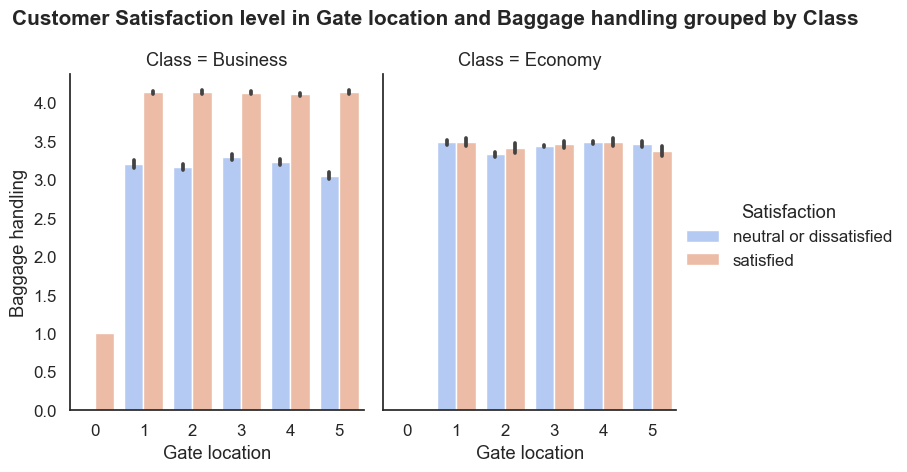

In [426]:
# Visualization of the Customer Satisfaction level in relation to  Gate location and Baggage handling by Class
sns.set(style='white',font_scale=1.1)
fig_ct = plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Gate location', y ='Baggage handling', hue = 'Satisfaction', kind = 'bar', col = 'Class', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfaction level in Gate location and Baggage handling grouped by Class', y = 1.05, weight='bold', fontsize = 15)
wrap_labels(axt, 10)

plt.show()

This plot shows that for customers in Business Class there is a high customer satisfaction level in all Gate locations scores

**Customer Satisfaction level in relation to Inflight wifi service and Inflight entertainment by Class**

<Figure size 400x300 with 0 Axes>

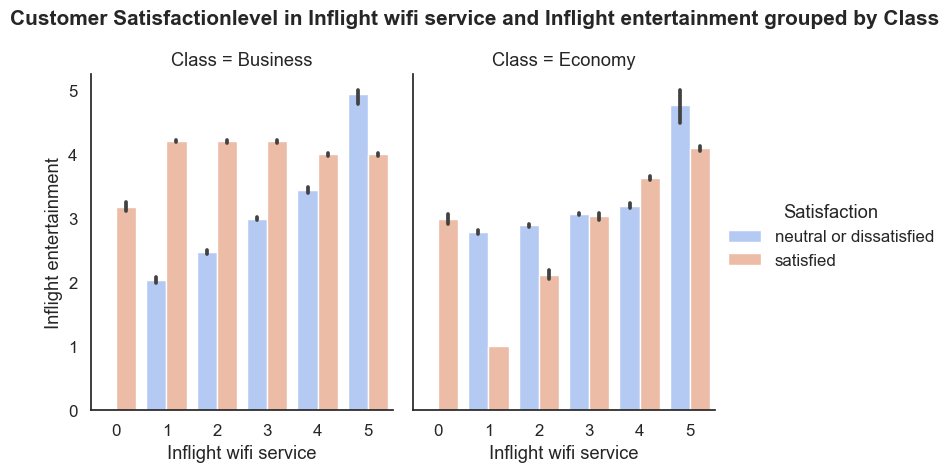

In [427]:
# Visualization of the Customer Satisfaction level in relation to Inflight wifi service and Inflight entertainment by Class
sns.set(style='white',font_scale=1.1)
fig_ct = plt.figure(figsize=(4,3))
axt = fig.add_axes([1,1,2,2])
sns.catplot(data = df_train, x = 'Inflight wifi service', y ='Inflight entertainment', hue = 'Satisfaction', kind = 'bar', col = 'Class', palette = 'coolwarm', height = 4.5, aspect = 0.8)
plt.suptitle('Customer Satisfactionlevel in Inflight wifi service and Inflight entertainment grouped by Class', y = 1.05, weight='bold', fontsize = 15)
wrap_labels(axt, 10)

plt.show()

**Customer Satisfaction level by Departure and Arrival Delay in Minutes**

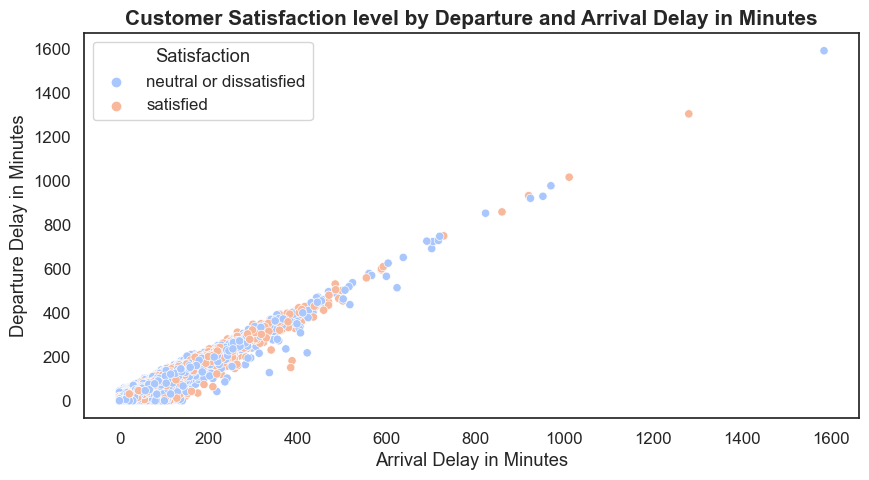

In [428]:
# Visualization of Customer Satisfaction in relation to Departure and Arrival Delay in Minutes
plt.figure(figsize=(10,5), dpi = 100)
ax_ad = fig.add_axes([0,0,1,1])
sns.scatterplot(data = df_train, x = 'Arrival Delay in Minutes', y = 'Departure Delay in Minutes', hue = 'Satisfaction', palette = 'coolwarm', alpha = 1)
plt.title('Customer Satisfaction level by Departure and Arrival Delay in Minutes', weight='bold',fontsize='15')
ax.set_xlabel('Arrival Delay in Minutes', fontsize=14, weight='semibold')
ax.set_ylabel('Departure Delay in Minutes', fontsize=15, weight='semibold')
wrap_labels(ax_ad, 10)

This scatterplot shows and confirms that the Departure and Arrival Delay in minutes have a linear relationship.

**Customer Satisfaction level by Departure Delay in Minutes and Flight Distance**

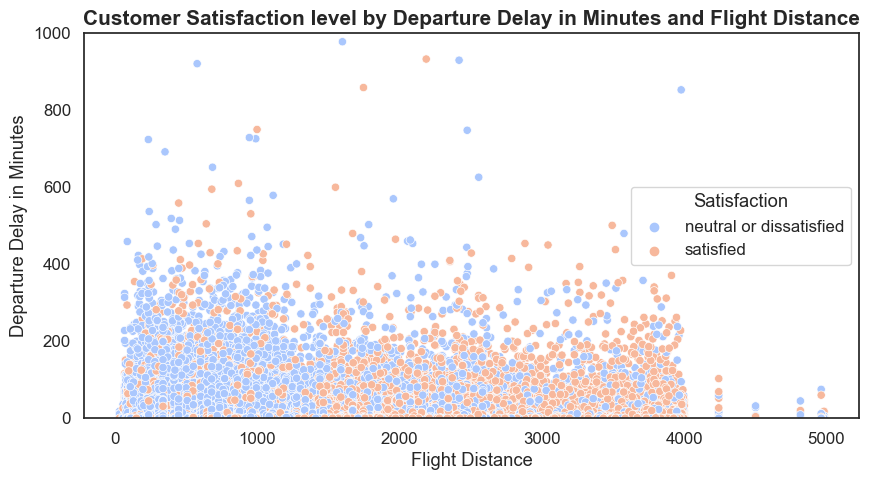

In [429]:
# Visualization of Customer Satisfaction in relation to Flight Distance and Departure Delay in Minutes
plt.figure(figsize=(10,5), dpi = 100)
ax_fd = fig.add_axes([0,0,1,1])
sns.scatterplot(data = df_train, x = 'Flight Distance', y = 'Departure Delay in Minutes', hue = 'Satisfaction', palette = 'coolwarm', alpha = 1)
plt.title('Customer Satisfaction level by Departure Delay in Minutes and Flight Distance', weight='bold',fontsize='15')
ax.set_xlabel('Flight Distance', fontsize=14, weight='semibold')
ax.set_ylabel('Departure Delay in Minutes', fontsize=15, weight='semibold')
plt.ylim(0, 1000)
wrap_labels(ax_fd, 10)

This scaterplott shows that when the flight distance is small, the airline customers are more likely to be neutral/dissatisfied with a delay in the departure.

### Dimensionality Reduction

**Feature Selection**

In [430]:
# Encoding Categorical Variables
# Label Encoding in train dataset (transform categorical data)
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_train.select_dtypes(include =['object']).columns:
    lencoders[col] = LabelEncoder()
    df_train[col] = lencoders[col].fit_transform(df_train[col])

In [431]:
# Label Encoding in test dataset
lencoders = {}
for col in df_test.select_dtypes(include =['object']).columns:
    lencoders[col] = LabelEncoder()
    df_test[col] = lencoders[col].fit_transform(df_test[col])

### **Correlation among features**

<AxesSubplot:>

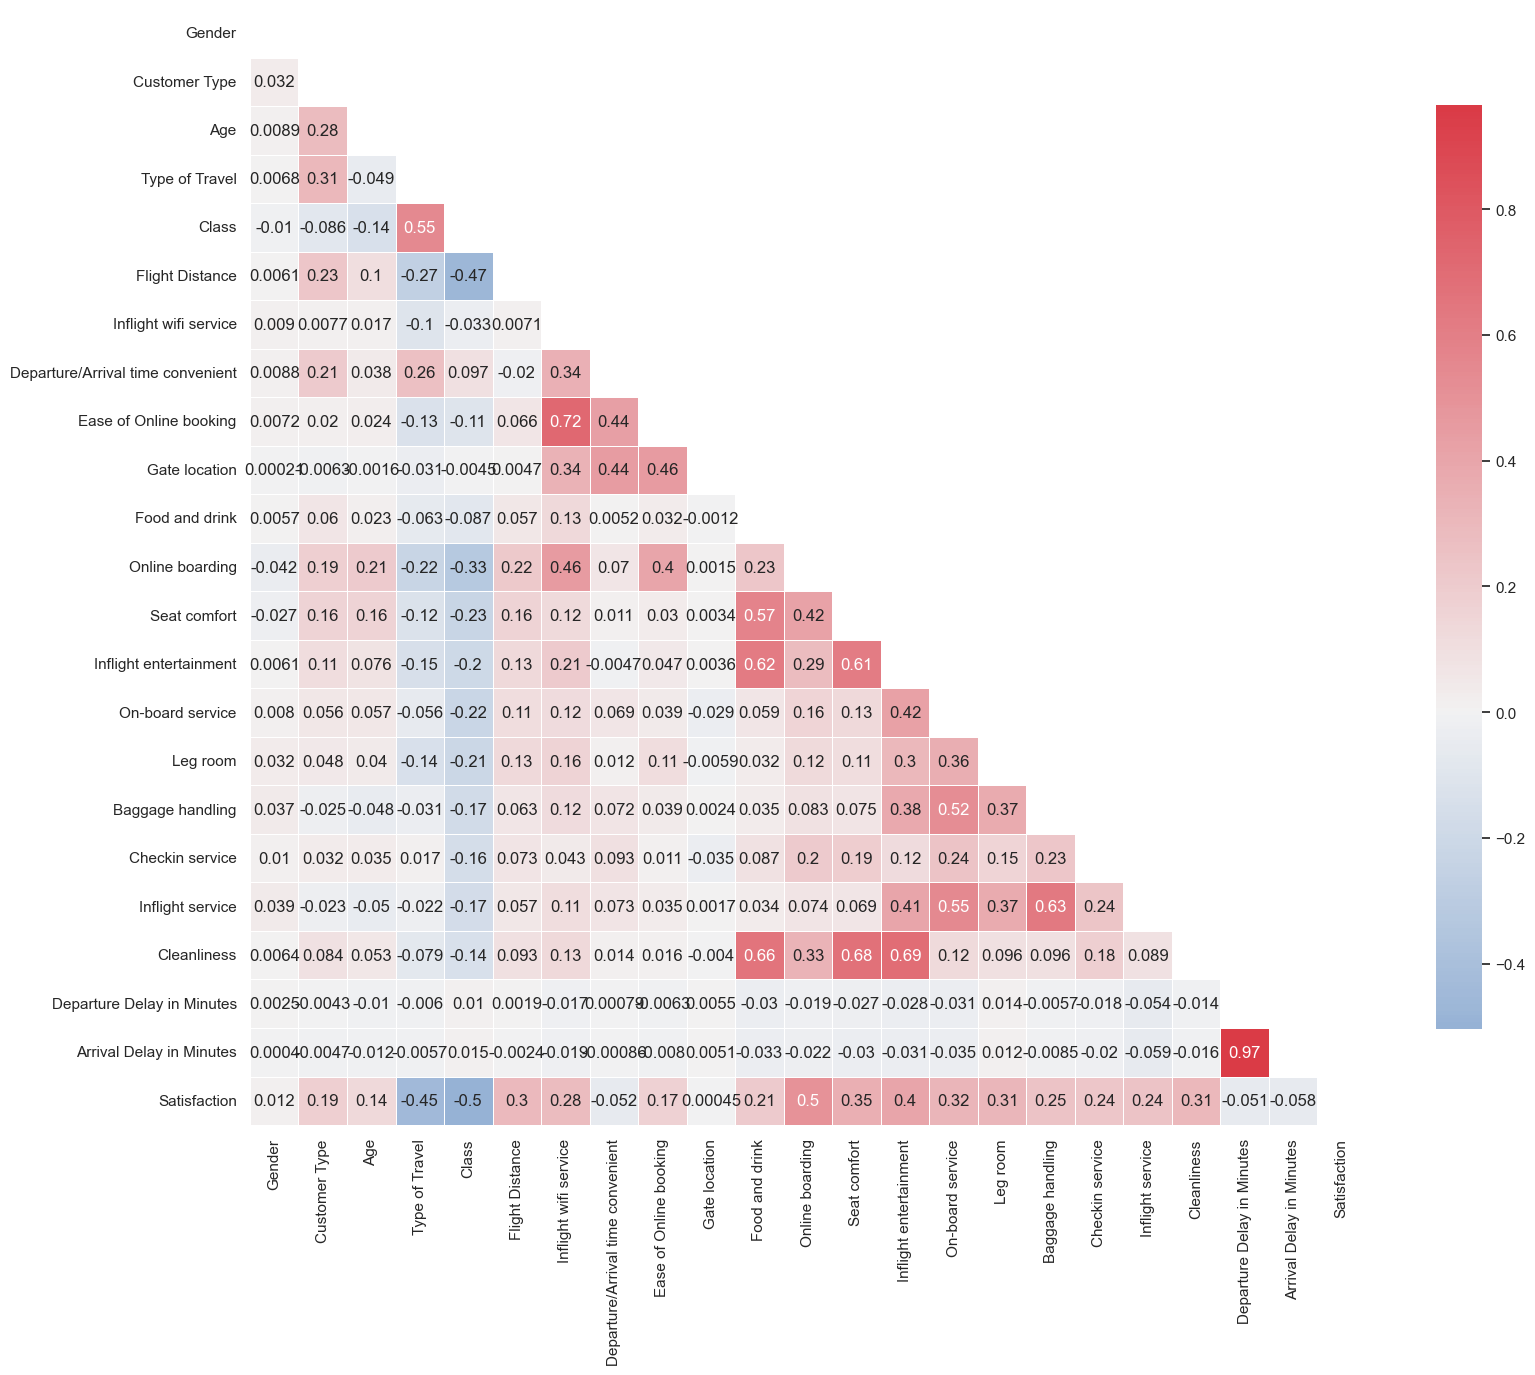

In [439]:
# Compute correlation
sns.set_theme(style="white")
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,
            square=True, annot = True, linewidths=.5, cbar_kws={"shrink": .8})

This correlation matrix shows that the Satisfaction target feature  has some correlation with all other features, except for Gender and Gate location features. 
Moreover, this correlation shows that there is a positively high correlation (0.97) between Departure and Arrival Delay in Minutes, as it is expected.

**Feature permutation Importance**

In [437]:
# Importance features from correlation matrix
df_train.corr().abs()['Satisfaction'].sort_values(ascending = False)

Satisfaction                         1.000000
Class                                0.503944
Online boarding                      0.503447
Type of Travel                       0.448995
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room                             0.313182
Cleanliness                          0.305050
Flight Distance                      0.298915
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Customer Type                        0.187558
Ease of Online booking               0.171507
Age                                  0.137040
Arrival Delay in Minutes             0.057582
Departure/Arrival time convenient    0.051718
Departure Delay in Minutes           0.050515
Gender                            

The features that has relatively high correlaction with the Satisfaction target feature are (approximately): 
Class (50%) 
Online boarding (50%) 
Type of Travel (45%) 
Inflight entertainment (40%) 
Seat comfort (35%) 
On-board service (32%) 
Leg room (31%) 
Cleanliness (31%) 
Flight Distance (30%)

In [452]:
# Feature Importance using Permutation Importance
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1464 ± 0.0018,Inflight wifi service
0.1425 ± 0.0014,Type of Travel
0.0528 ± 0.0004,Customer Type
0.0455 ± 0.0011,Online boarding
0.0281 ± 0.0004,Checkin service
0.0268 ± 0.0006,Class
0.0265 ± 0.0006,Seat comfort
0.0258 ± 0.0008,Baggage handling
0.0208 ± 0.0007,Inflight service
0.0195 ± 0.0009,Cleanliness


### Building Models

In [456]:
features = ['Type of Travel','Inflight wifi service','Online boarding','Seat comfort','Flight Distance',
            'Inflight entertainment','On-board service','Leg room','Cleanliness','Checkin service', 
            'Inflight service', 'Baggage handling']
target = ['Satisfaction']

# Split into test and train
X_train = df_train[features]
y_train = df_train[target].to_numpy()
X_test = df_test[features]
y_test = df_test[target].to_numpy()

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [457]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

**Logistic Regression**

Accuracy = 0.8535511528212258
ROC Area under Curve = 0.8494170214992703
Time taken = 0.6670358180999756
              precision    recall  f1-score   support

           0    0.85959   0.88326   0.87127     14528
           1    0.84533   0.81557   0.83018     11365

    accuracy                        0.85355     25893
   macro avg    0.85246   0.84942   0.85072     25893
weighted avg    0.85333   0.85355   0.85323     25893



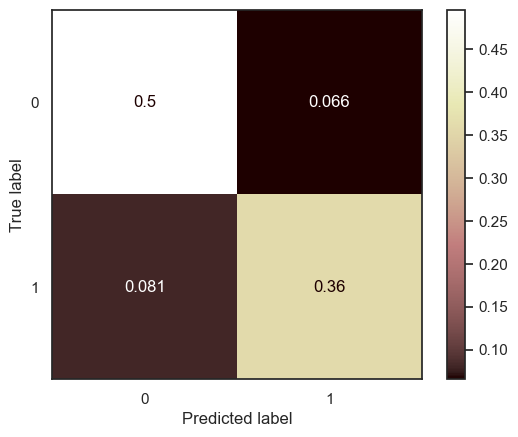

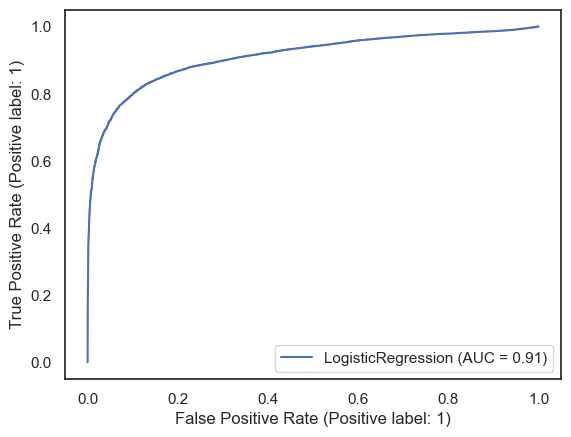

In [462]:
# Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

### Naive Bayes

Accuracy = 0.8489553161086008
ROC Area under Curve = 0.8452256976409527
Time taken = 0.05100893974304199
              precision    recall  f1-score   support

           0    0.85798   0.87576   0.86678     14528
           1    0.83686   0.81469   0.82563     11365

    accuracy                        0.84896     25893
   macro avg    0.84742   0.84523   0.84620     25893
weighted avg    0.84871   0.84896   0.84872     25893



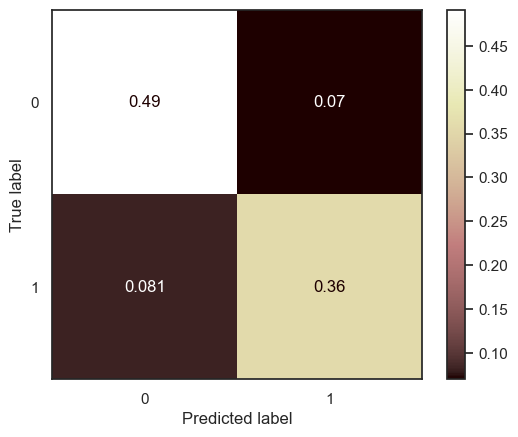

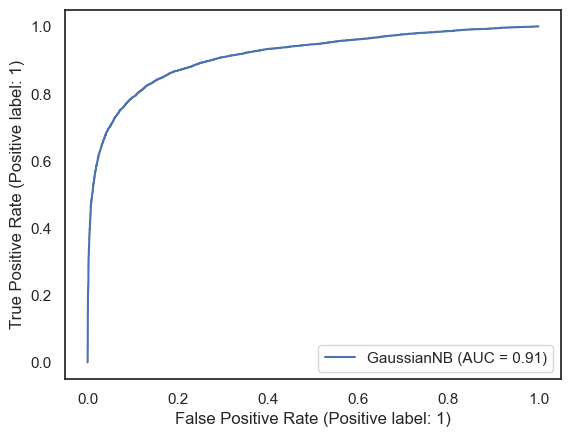

In [463]:
params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

### K-Nearest Neighbor

Accuracy = 0.9265052330745761
ROC Area under Curve = 0.9201668855904692
Time taken = 6.6056969165802
              precision    recall  f1-score   support

           0    0.90416   0.97205   0.93688     14528
           1    0.96048   0.86828   0.91206     11365

    accuracy                        0.92651     25893
   macro avg    0.93232   0.92017   0.92447     25893
weighted avg    0.92888   0.92651   0.92598     25893



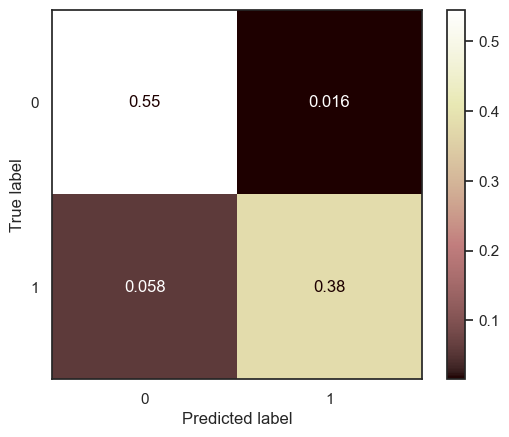

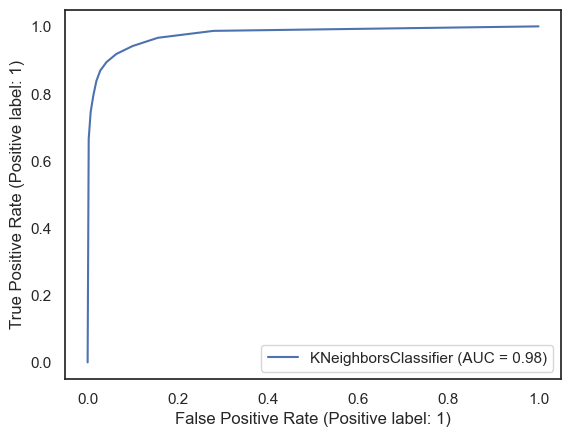

In [464]:
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

### Decision Tree

Accuracy = 0.930869346927741
ROC Area under Curve = 0.9282800111343468
Time taken = 0.0957944393157959
              precision    recall  f1-score   support

           0    0.92889   0.94948   0.93907     14528
           1    0.93353   0.90708   0.92012     11365

    accuracy                        0.93087     25893
   macro avg    0.93121   0.92828   0.92959     25893
weighted avg    0.93093   0.93087   0.93075     25893



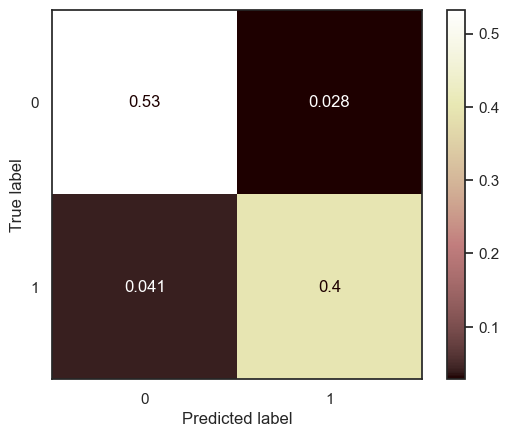

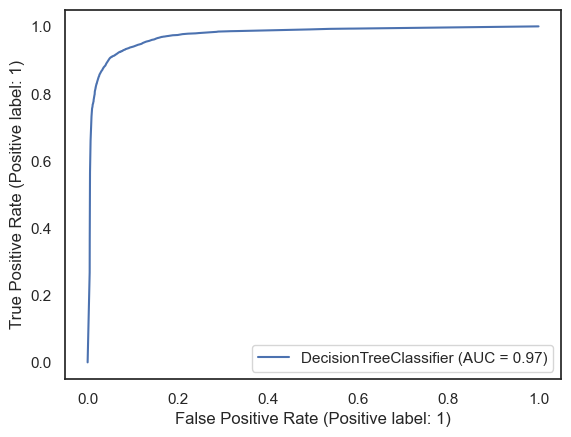

In [465]:
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

### Random Forest

Accuracy = 0.9526512957169891
ROC Area under Curve = 0.9500279388279573
Time taken = 7.270251512527466
              precision    recall  f1-score   support

           0    0.94560   0.97150   0.95838     14528
           1    0.96225   0.92855   0.94510     11365

    accuracy                        0.95265     25893
   macro avg    0.95392   0.95003   0.95174     25893
weighted avg    0.95291   0.95265   0.95255     25893



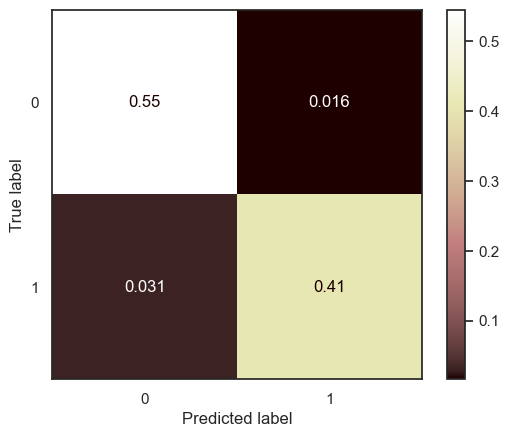

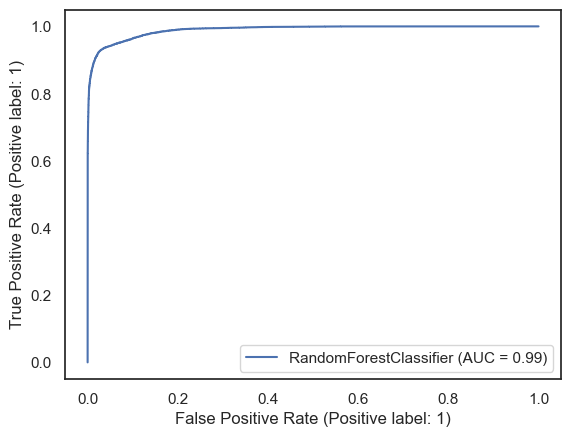

In [469]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

### Extreme Gradient Boosting (XGBoost)

[18:43:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.9427644537133588
ROC Area under Curve = 0.9409970624560294
Time taken = 31.355018854141235
              precision    recall  f1-score   support

           0    0.94326   0.95547   0.94932     14528
           1    0.94211   0.92653   0.93426     11365

    accuracy                        0.94276     25893
   macro avg    0.94269   0.94100   0.94179     25893
weighted avg    0.94276   0.94276   0.94271     25893



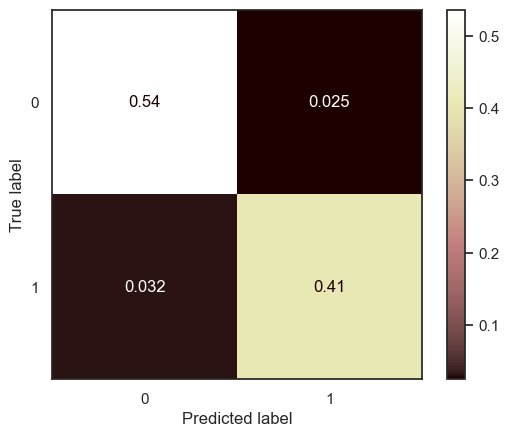

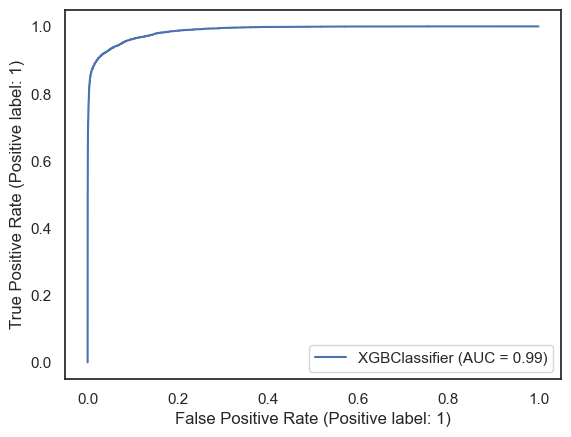

In [468]:
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)